In [626]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [627]:
# Importing the data
sales_data=pd.read_excel("Dataa (1).xlsx")

In [628]:
# we will see the shape
sales_data.shape

(125093, 48)

In [629]:
# checking the first five rows
sales_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Opportunity Owner,Account Name,Opportunity Name,Product Name,Product Family,Product Description,Total Price Currency,Total Price,TYPE,Amount Currency,...,Proposed Date,Price Book Name,Hyperion Product Grouping,Opportunity Product: Created Date,Sub Branch,Business Region,Close Date,STATUS,BUSINESS_UNIT,PRODUCT_LEVEL_1
1,Cihan Karabulut,Anda Otomasyon Yangın Söndürme Sistemleri Sana...,ANDA OTOMASYON - PARTS,JCI BAS,Controls,NaN,USD,2261,Installation,USD,...,2023-02-22 00:00:00,NaN,tbc,2018-09-25T14:29:45Z,NaN,MEA,2023-02-27 00:00:00,Closed Won,HVAC,Controls
2,Andrew Hughes,CBRE MANAGED SERVICES LTD,BT Wakefield ATE- faulty VLP 2nd MOD - BT - Fire,Fire Detection,Fire Alarm & Detection,NaN,GBP,3855.13,Service,GBP,...,2023-02-06 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-02-06 00:00:00,Closed Won,Fire & Security,Fire Detection
3,Andrew Hughes,CBRE MANAGED SERVICES LTD,BT Wakefield ATE- faulty VLP 2nd MOD - BT - Fire,Fire Detection,Fire Alarm & Detection,NaN,GBP,3855.13,Installation,GBP,...,2023-02-06 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-02-06 00:00:00,Closed Won,Fire & Security,Fire Detection
4,Emma Morrison,The Real Good Dental Ltd,The Real Good Dental Ltd-RS Intr,Intrusion,Security,NaN,GBP,0,Installation,GBP,...,2023-06-25 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-06-26 00:00:00,Closed No Opportunity,Fire & Security,Intrusion


In [630]:
# As we can see the columns have become rows, so we nned to make the data 
sales_data.columns=sales_data.iloc[0,:]
sales_data.drop(0,axis=0,inplace=True)
sales_data.head()

,Opportunity Owner,Account Name,Opportunity Name,Product Name,Product Family,Product Description,Total Price Currency,Total Price,TYPE,Amount Currency,...,Proposed Date,Price Book Name,Hyperion Product Grouping,Opportunity Product: Created Date,Sub Branch,Business Region,Close Date,STATUS,BUSINESS_UNIT,PRODUCT_LEVEL_1
1,Cihan Karabulut,Anda Otomasyon Yangın Söndürme Sistemleri Sana...,ANDA OTOMASYON - PARTS,JCI BAS,Controls,NaN,USD,2261,Installation,USD,...,2023-02-22 00:00:00,NaN,tbc,2018-09-25T14:29:45Z,NaN,MEA,2023-02-27 00:00:00,Closed Won,HVAC,Controls
2,Andrew Hughes,CBRE MANAGED SERVICES LTD,BT Wakefield ATE- faulty VLP 2nd MOD - BT - Fire,Fire Detection,Fire Alarm & Detection,NaN,GBP,3855.13,Service,GBP,...,2023-02-06 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-02-06 00:00:00,Closed Won,Fire & Security,Fire Detection
3,Andrew Hughes,CBRE MANAGED SERVICES LTD,BT Wakefield ATE- faulty VLP 2nd MOD - BT - Fire,Fire Detection,Fire Alarm & Detection,NaN,GBP,3855.13,Installation,GBP,...,2023-02-06 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-02-06 00:00:00,Closed Won,Fire & Security,Fire Detection
4,Emma Morrison,The Real Good Dental Ltd,The Real Good Dental Ltd-RS Intr,Intrusion,Security,NaN,GBP,0,Installation,GBP,...,2023-06-25 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-06-26 00:00:00,Closed No Opportunity,Fire & Security,Intrusion
5,Emma Morrison,The Real Good Dental Ltd,The Real Good Dental Ltd-RS Intr,Intrusion,Security,NaN,GBP,0,Service,GBP,...,2023-06-25 00:00:00,NaN,tbc,2014-02-27T14:34:48Z,NaN,UK&I,2023-06-26 00:00:00,Closed No Opportunity,Fire & Security,Intrusion


In [631]:
# We will check what all columns we have with us
print(sales_data.columns)

Index(['Opportunity Owner', 'Account Name', 'Opportunity Name', 'Product Name',
       'Product Family', 'Product Description', 'Total Price Currency',
       'Total Price', 'TYPE', 'Amount Currency', 'Amount', 'Stage',
       'Probability(%)', 'Owner Role', 'Created_Date',
       'Sales Price (converted) Currency',
       'Line Amount-Sales Price (converted)',
       'Total Price (converted) Currency', 'Total Price (converted)',
       'Sales Price Currency', 'Sales Price', 'Quantity', 'Product Code',
       'Active Product', 'Opportunity Currency', 'Opportunity ID',
       'Line Description', 'Type - SubType', 'New / Existing Business',
       'Operating Company', 'User Region', 'Sub Region', 'User Country',
       'BV_ReportingLevel1', 'BV_ReportingLevel2', 'BV_ReportingLevel3',
       'BV_ReportingLevel4', 'BV_Country', 'Proposed Date', 'Price Book Name',
       'Hyperion Product Grouping', 'Opportunity Product: Created Date',
       'Sub Branch', 'Business Region', 'Close Date', '

In [632]:
# Checking the dtypes of the columns
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125092 entries, 1 to 125092
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Opportunity Owner                    125092 non-null  object
 1   Account Name                         125088 non-null  object
 2   Opportunity Name                     125085 non-null  object
 3   Product Name                         122834 non-null  object
 4   Product Family                       122505 non-null  object
 5   Product Description                  0 non-null       object
 6   Total Price Currency                 125092 non-null  object
 7   Total Price                          123208 non-null  object
 8   TYPE                                 125092 non-null  object
 9   Amount Currency                      125092 non-null  object
 10  Amount                               123208 non-null  object
 11  Stage                     

In [633]:
# Chekcing the null values
round((sales_data.isnull().sum()/sales_data.shape[0])*100,2)

0
Opportunity Owner                        0.00
Account Name                             0.00
Opportunity Name                         0.01
Product Name                             1.81
Product Family                           2.07
Product Description                    100.00
Total Price Currency                     0.00
Total Price                              1.51
TYPE                                     0.00
Amount Currency                          0.00
Amount                                   1.51
Stage                                    0.00
Probability(%)                           0.00
Owner Role                               0.00
Created_Date                             0.00
Sales Price (converted) Currency         0.00
Line Amount-Sales Price (converted)      1.51
Total Price (converted) Currency         0.00
Total Price (converted)                  1.51
Sales Price Currency                     0.00
Sales Price                              1.51
Quantity                        

#### We will delete the columns with 100% null values and then will inspect the 'product code' column

In [634]:
# dropping the columns
sales_data.drop(['Line Description','Product Description','Price Book Name','Sub Branch'],axis=1,inplace=True)

In [635]:
# inspecting product code columns
sales_data['Product Code'].value_counts()

Product Code
Intrusion                   4994
Detection                   4312
Waterbased                  3333
Portables                   1773
CE - Other Controls         1600
                            ... 
1104                           1
SOF5434-LIC                    1
1965                           1
YVAA0275 / YVAA0965 50HZ       1
C3832                          1
Name: count, Length: 703, dtype: int64

#### We can use product name and product family, so will delete the product code columns as any way it consists of 68% null values


In [636]:
#Dropping the product code column
sales_data.drop('Product Code',axis=1,inplace=True)

### For rest of the columns we are going to drop the NA values as the data lost will not be that much

In [637]:
sales_data.dropna(axis=0,inplace=True)

In [638]:
# Chekcing the null values
round((sales_data.isnull().sum()/sales_data.shape[0])*100,2).sort_values(ascending=False)

0
Opportunity Owner                      0.0
BV_ReportingLevel3                     0.0
Type - SubType                         0.0
New / Existing Business                0.0
Operating Company                      0.0
User Region                            0.0
Sub Region                             0.0
User Country                           0.0
BV_ReportingLevel1                     0.0
BV_ReportingLevel2                     0.0
BV_ReportingLevel4                     0.0
Opportunity Currency                   0.0
BV_Country                             0.0
Proposed Date                          0.0
Hyperion Product Grouping              0.0
Opportunity Product: Created Date      0.0
Business Region                        0.0
Close Date                             0.0
STATUS                                 0.0
BUSINESS_UNIT                          0.0
Opportunity ID                         0.0
Active Product                         0.0
Account Name                           0.0
Stage    

In [639]:
# Converting sales price to float from object
sales_data['Sales Price']=sales_data['Sales Price'].astype(float)
# converting closed date and proposed date into datetime
sales_data['Proposed Date_dt']=pd.to_datetime(sales_data['Proposed Date'])
sales_data['Close Date_dt']=pd.to_datetime(sales_data['Close Date'])
sales_data['Created_Date_dt']=pd.to_datetime(sales_data['Created_Date'])
sales_data['Opportunity Product: Created Date_dt']=pd.to_datetime(sales_data['Opportunity Product: Created Date'])
sales_data['month_created_dt']=sales_data['Created_Date_dt'].dt.month
sales_data['month_closed_dt']=sales_data['Close Date_dt'].dt.month
sales_data.drop(['Proposed Date','Close Date','Created_Date','Opportunity Product: Created Date'],axis=1,inplace=True)

### ------------------------------------------------------------------------------------------------

### Data Analysis

### ------------------------------------------------------------------------------------------------

### With the help of pie chart and bar chart we will see what is composition if the 'status' columns

Text(0.5, 1.0, 'Total Enquiries in each category')

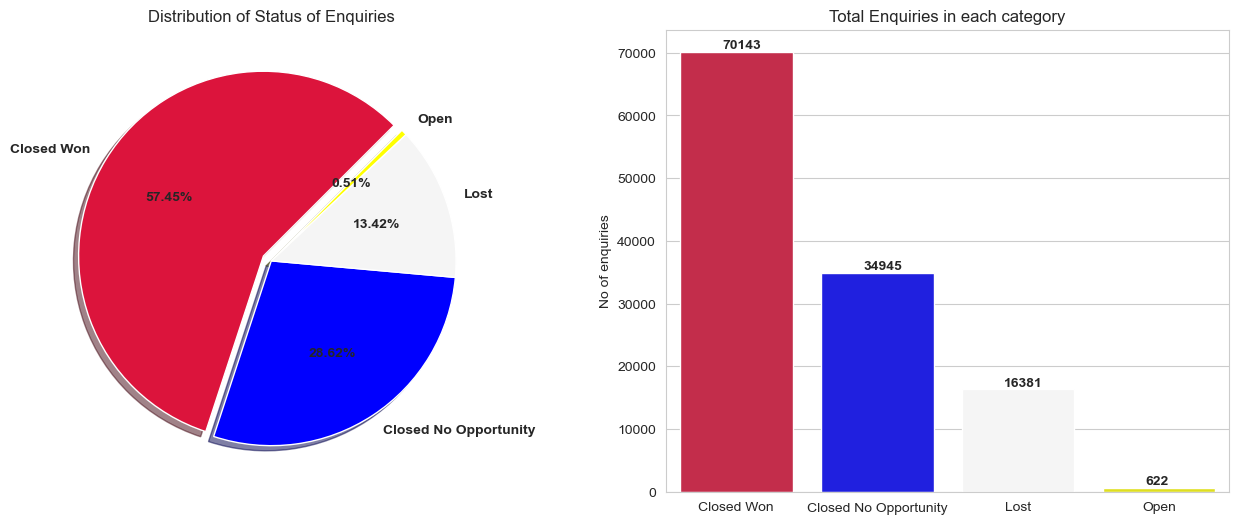

In [640]:

size=sales_data['STATUS'].value_counts()
label=sales_data['STATUS'].value_counts().index
explode=[0.05,0,0,0]
color=['crimson','blue','whitesmoke','yellow']
sbn.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=color,
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution of Status of Enquiries")

plt.subplot(1,2,2)
sbn.barplot(x=sales_data['STATUS'].value_counts().index,y=sales_data['STATUS'].value_counts(),palette=color)
plt.xlabel("")
plt.ylabel("No of enquiries")
for i,j in enumerate(sales_data['STATUS'].value_counts()):
    plt.text(i-0.1,j+500,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

#### From Above graph we can see that 57.45% of our enquiries were converted to win while we lost 13.42%. About 28.62% were closed with no result that means the enquiries got delayed or cancelled and about slightly more than half a percent are still on going

#### Next we will see how many of the above wins came from existing and new clients

##### ------------------------------------------------------------------------------------------------

In [641]:
win_data=sales_data[sales_data['STATUS']=='Closed Won']

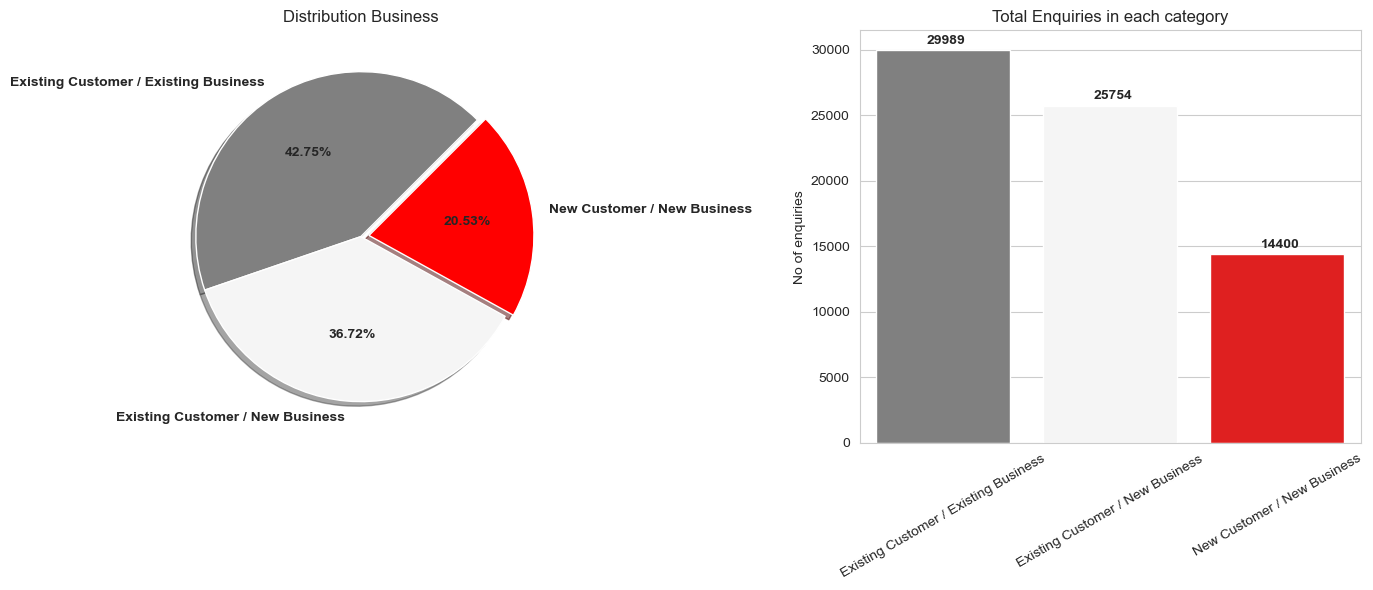

In [642]:

size=win_data['New / Existing Business'].value_counts()
label=win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
color=['grey','whitesmoke','red']
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=color,
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=color)
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+500,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### The pie chart depicts that , 42.755 enquiries which were converted were from existing business in other words they were Variation Orders.20% Enquirirs were from new business with new customer
#### We can also see that approximately 79% of the enquiries which were converted into a business were from existing customers

##### ------------------------------------------------------------------------------------------------

In [643]:
loss_data=sales_data[sales_data['STATUS']=='Lost']

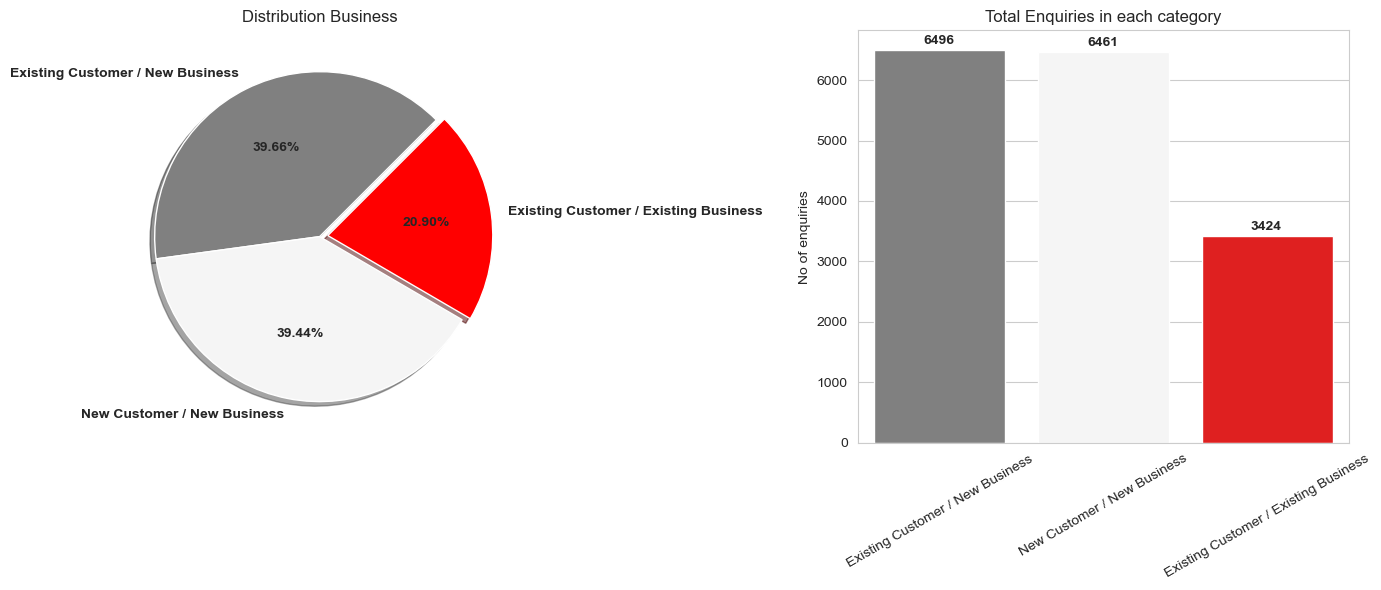

In [644]:

size=loss_data['New / Existing Business'].value_counts()
label=loss_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
color=['grey','whitesmoke','red']
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=color,
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=color)
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(loss_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+100,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### We can clearly understand that, about 39.4% enquiries from new customer could not be converted into a business. Also, interestingly, about same percent of enquiries from existing customer were lost.And we lost aboiut 21% of variation enquiries 

##### ------------------------------------------------------------------------------------------------

#### We will inspect the business from revenue context

In [645]:
revenue=win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue=round(revenue/1000000,2)  # converting to million USD

In [646]:
revenue.index

Index(['Existing Customer / Existing Business',
       'Existing Customer / New Business', 'New Customer / New Business'],
      dtype='object', name='New / Existing Business')

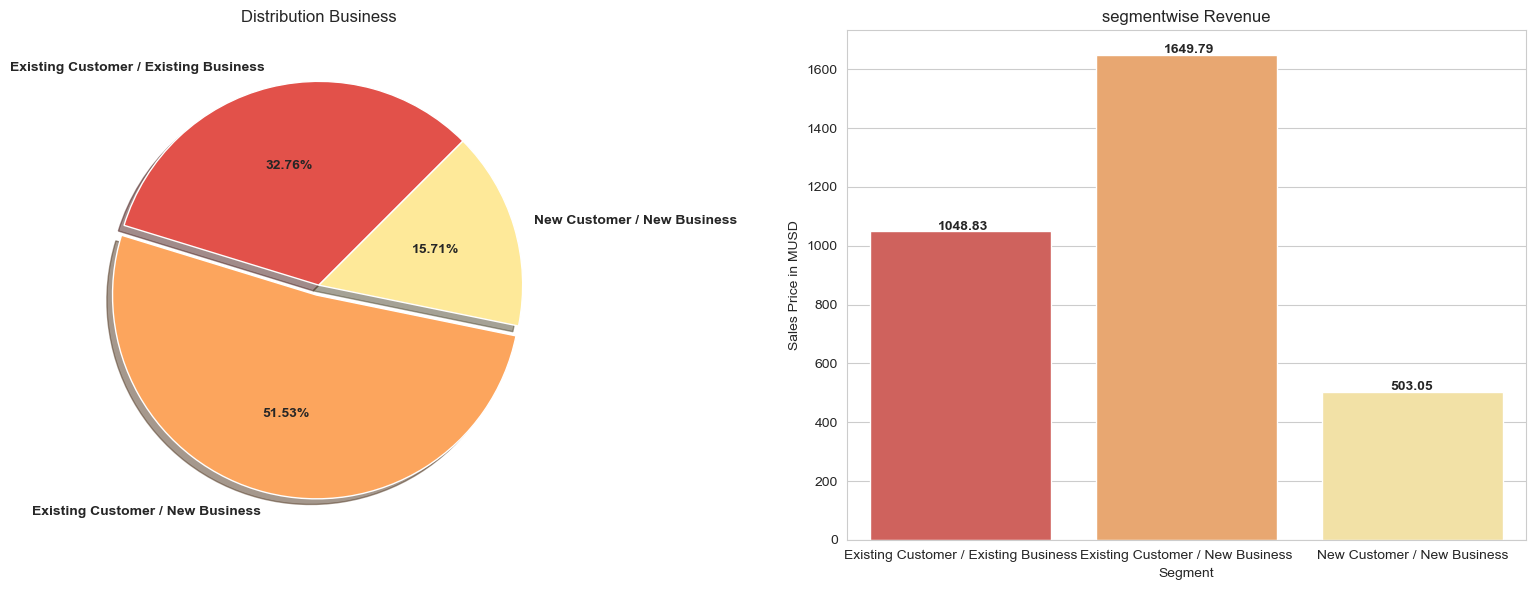

In [647]:
size=revenue
label=revenue.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=revenue.index,y=revenue,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue):
    plt.text(i-0.1,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue")
plt.tight_layout()

#### We can observe that new business from exising customer is respinsoble for more than 51% of the total revenue amounting to 1649 MSUD.
#### Revenue from variation order was approximately 33%- 1048 MUSD 
#### Business from new customer is accountable for only 16% revenue

##### ------------------------------------------------------------------------------------------------

#### We will see business revenue regionwise

In [648]:
# Understanding the total business regions
sales_data['Business Region'].value_counts()

Business Region
UK&I               73646
Europe North       15909
Europe South       11810
Global Retail      10304
LATAM               5856
MEA                 4349
IREF EMEA            203
BlueView EMEALA        6
GCoE                   5
SMAX EMEA              3
Name: count, dtype: int64

Text(0.5, 1.0, 'Regionwise Revenue')

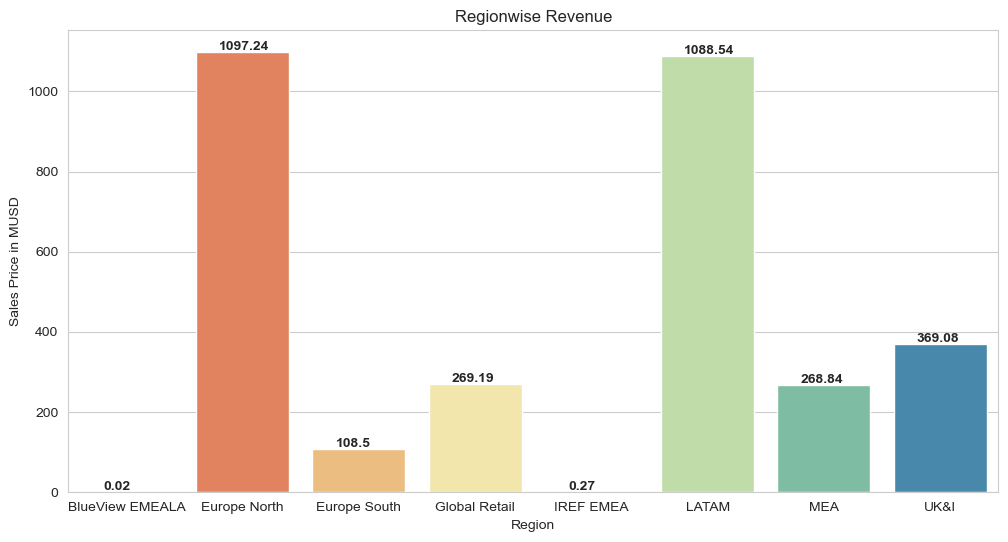

In [649]:
# plotting revenues for different regions
revenue_data=win_data.groupby(by='Business Region')['Sales Price'].agg('sum')
revenue_data=round(revenue_data/1000000,2)  # converting to million USD
plt.figure(figsize=(12,6))
sbn.barplot(x=revenue_data.index,y=revenue_data,palette="Spectral")
for i,j in enumerate(revenue_data):
    plt.text(i-0.2,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Region")
plt.ylabel("Sales Price in MUSD")
plt.title("Regionwise Revenue")

#### We can see that Northen Europe was the most prolific region generating revenue of more than 1000MUS. LATAM was not so behind, laaging only by 9 MUSD behind Northen Europe
#### Southern Europe generated aprroximately only 10% of the northen europe revenue.

##### ------------------------------------------------------------------------------------------------

## We will dive into region-wise Analysis


##### ------------------------------------------------------------------------------------------------

### 1.Europe North

In [650]:
# We will select the data for northen europe region
Europe_north=sales_data[sales_data['Business Region']=='Europe North']

In [651]:
Europe_north.columns

Index(['Opportunity Owner', 'Account Name', 'Opportunity Name', 'Product Name',
       'Product Family', 'Total Price Currency', 'Total Price', 'TYPE',
       'Amount Currency', 'Amount', 'Stage', 'Probability(%)', 'Owner Role',
       'Sales Price (converted) Currency',
       'Line Amount-Sales Price (converted)',
       'Total Price (converted) Currency', 'Total Price (converted)',
       'Sales Price Currency', 'Sales Price', 'Quantity', 'Active Product',
       'Opportunity Currency', 'Opportunity ID', 'Type - SubType',
       'New / Existing Business', 'Operating Company', 'User Region',
       'Sub Region', 'User Country', 'BV_ReportingLevel1',
       'BV_ReportingLevel2', 'BV_ReportingLevel3', 'BV_ReportingLevel4',
       'BV_Country', 'Hyperion Product Grouping', 'Business Region', 'STATUS',
       'BUSINESS_UNIT', 'PRODUCT_LEVEL_1', 'Proposed Date_dt', 'Close Date_dt',
       'Created_Date_dt', 'Opportunity Product: Created Date_dt',
       'month_created_dt', 'month_closed_d

In [652]:
# Lets examine which countries fall in northen europe region
Europe_north['BV_Country'].unique()

array(['Czech Republic', 'Germany', 'Denmark', 'Netherlands', 'Austria',
       'Switzerland', 'Poland', 'Belgium', 'Hungary',
       'Russian Federation', 'Norway', 'Finland', 'Slovakia', 'Ukraine'],
      dtype=object)

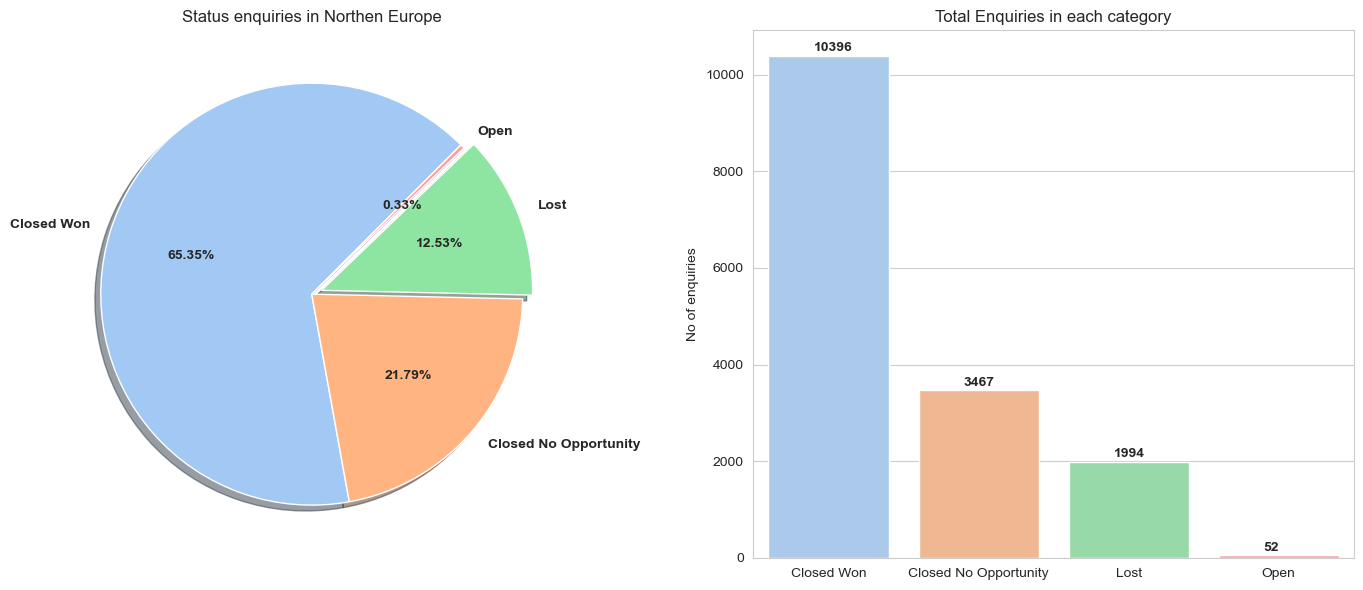

In [653]:
# Lets see how  distribution of enquiries has been

size=Europe_north['STATUS'].value_counts()
label=Europe_north['STATUS'].value_counts().index
explode=[0,0,0.05,0]

sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("pastel"),
        autopct='%1.2f%%',shadow=True,startangle=45,radius=1,textprops={'weight':'bold'})
plt.title("Status enquiries in Northen Europe")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("pastel"))
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("No of enquiries")
for i,j in enumerate(Europe_north['STATUS'].value_counts()):
    plt.text(i-0.1,j+100,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Northen Europe has a win rate of 65.35% with just 12.53% loss.

#### We will see what is the Business Distribution for the orders which have been won

In [654]:
NE_win_data=Europe_north[Europe_north['STATUS']=='Closed Won']

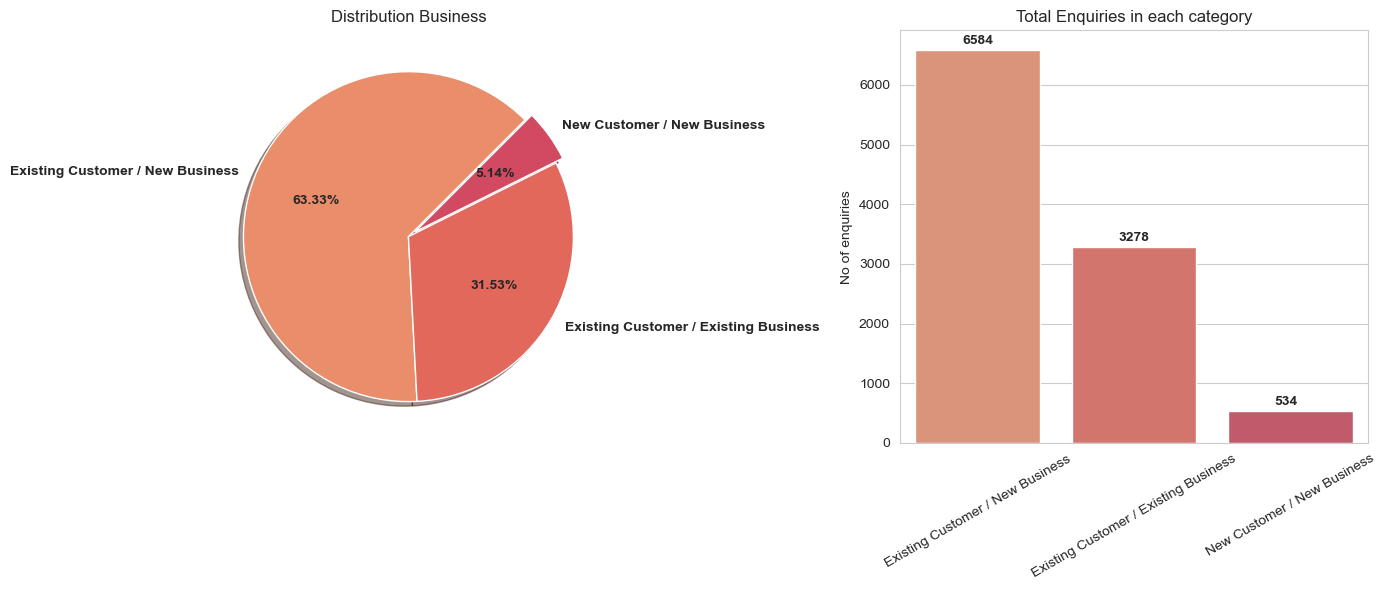

In [655]:

size=NE_win_data['New / Existing Business'].value_counts()
label=NE_win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("flare"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("flare"))
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(NE_win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+100,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Northen Europe's 63% business enquiries which we won were came from new business given by existing customerds, about 95% of its revenue has come from the enquiries given by existing customers and only 5% from new customers

#### Lets examine distribution of business revenuewise

In [656]:
revenue_ne=NE_win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue_ne=round(revenue_ne/1000000,2) # converting to million USD

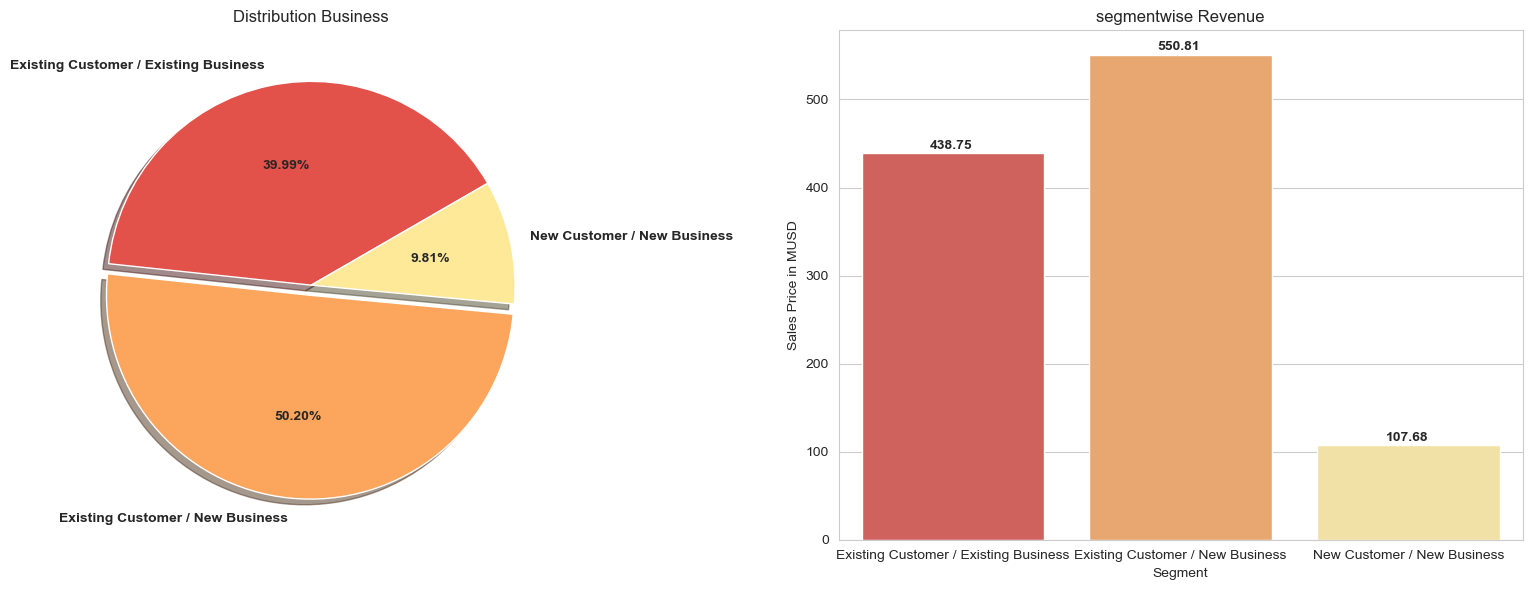

In [657]:
size=revenue_ne
label=revenue_ne.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=30,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=revenue_ne.index,y=revenue_ne,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue_ne):
    plt.text(i-0.1,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue")
plt.tight_layout()

#### Total 89% of Northen Europe's revenue has come from existing customers, 50% of these existing customers gave new business while 40% of the revenue was from VOs, only 10% business was from new customers

In [658]:
Ne_country=NE_win_data.groupby(by='BV_Country')['Sales Price'].agg('sum')
Ne_country=Ne_country/1000000
Ne_country=round((Ne_country/Ne_country.sum())*100,2)
Ne_country=Ne_country.sort_values(ascending=False)

Text(0.5, 1.0, 'Countrywise percent Revenue')

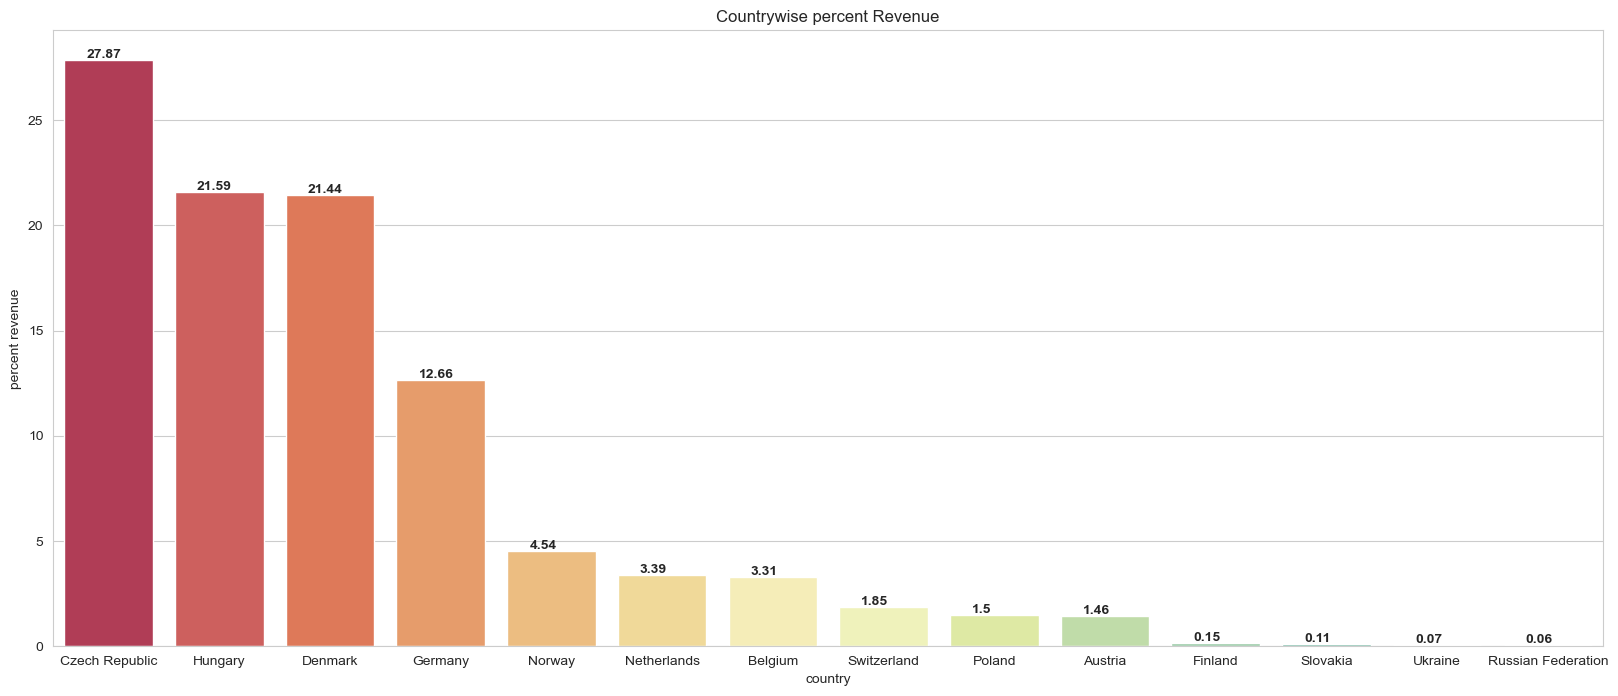

In [659]:
plt.figure(figsize=(20,8))
sbn.barplot(x=Ne_country.index,y=Ne_country,palette="Spectral")
for i,j in enumerate(Ne_country):
    plt.text(i-0.2,j+0.1,j,fontdict={'weight':'bold'})
plt.xlabel("country")
plt.ylabel("percent revenue")
plt.title("Countrywise percent Revenue")

#### We can see that more than Czech Republic, Hungary and Denmark were responsible for around 67% of total revenue.

#### We will see some important statistics

In [660]:
mean_days=np.mean((NE_win_data['Close Date_dt']-NE_win_data['Created_Date_dt'])).days
min_days=min((NE_win_data['Close Date_dt']-NE_win_data['Created_Date_dt'])).days
max_days=max((NE_win_data['Close Date_dt']-NE_win_data['Created_Date_dt'])).days
max_revenue=max(NE_win_data['Sales Price'])
min_revenue=min(NE_win_data['Sales Price'])


In [661]:
monthwise_revenue=NE_win_data.groupby(by='month_closed_dt')['Sales Price'].agg('sum')
monthwise_revenue=round(monthwise_revenue/1000000,2)

In [662]:
Ne_df=pd.DataFrame({'Description':['Avg Days for closure','Min days for closure','Max days for closure',
                                   'Highest grossing month/revenue','Lowest grossing month/revenue','Avg revenue',
                                  'Max_order_val','Min_order_val'],
                    'Values':[mean_days,min_days,max_days,(monthwise_revenue[monthwise_revenue==monthwise_revenue.max()].index.values[0],monthwise_revenue.max())
                    ,(monthwise_revenue[monthwise_revenue==monthwise_revenue.min()].index.values[0],monthwise_revenue.min()),monthwise_revenue.mean(),max_revenue,min_revenue]})
                          
Ne_df.index=Ne_df.Description
Ne_df.drop('Description', axis=1,inplace=True)

In [663]:
Ne_df

,Values
Description,
Avg Days for closure,95
Min days for closure,-72
Max days for closure,2787
Highest grossing month/revenue,"(6, 274.76)"
Lowest grossing month/revenue,"(3, 98.98)"
Avg revenue,182.873333
Max_order_val,151196975.0
Min_order_val,-185445.0


#### We will draw a line plot to observe the monthwise revenue

Text(0.8, 184.87333333333333, 'Avg= 183')

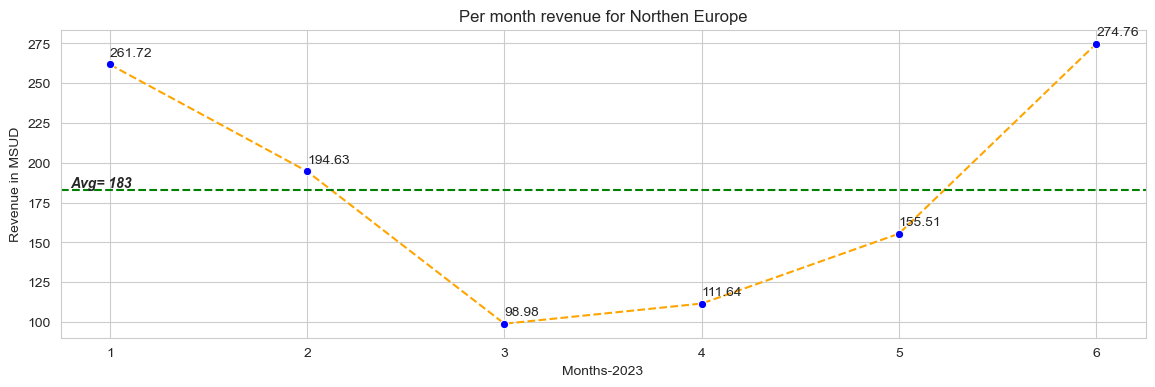

In [664]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=monthwise_revenue.index,y=monthwise_revenue,marker='o', markerfacecolor='blue',markersize=6,color='orange',linestyle='dashed',linewidth=1.5)
plt.axhline(monthwise_revenue.mean(),color='green',linestyle='dashed',label='Avg line')
plt.xlabel("Months-2023")
plt.ylabel("Revenue in MSUD")
plt.title("Per month revenue for Northen Europe")
for i,j in enumerate(monthwise_revenue):
    plt.text(i+1,j+5,j)
plt.text(0.8,monthwise_revenue.mean()+2,"Avg= "+str(round(monthwise_revenue.mean())),fontdict={'weight':'bold','style':'italic'})

#### We can see that there is a substantial-62% decline in the revenue from jan to march. The revenue gradually inceases the following month and we can see that there is a whoping growth of 177% from march to June

#### We will perform cohort analysis

In [665]:
cohort_data=NE_win_data[['Account Name','Close Date_dt','Sales Price']]

In [666]:
# getting the month in whcih customer made the first purchase
cohort_data['Cust_aquire_mnth']=cohort_data.groupby(['Account Name'])['Close Date_dt'].transform('min')
cohort_data.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth
23,Vonovia SE,2023-05-02,1975.37,2023-01-27
34,Makeen Gas Solutions 6H27,2023-06-28,157165.00,2023-06-28
35,Makeen Gas Solutions 6H27,2023-06-28,200005.00,2023-06-28
36,Makeen Gas Solutions 6H27,2023-06-28,222722.00,2023-06-28
37,Makeen Gas Solutions 6H27,2023-06-28,455857.00,2023-06-28


In [667]:
# We will get the months and years for close date and cust acquired date
def get_yr_mnt(df,col_name):
    month=df[col_name].dt.month
    year=df[col_name].dt.year
    return month,year

In [668]:
close_month,close_year=get_yr_mnt(cohort_data,'Close Date_dt')
cust_month,cust_year=get_yr_mnt(cohort_data,'Cust_aquire_mnth')

In [669]:
# Now we will see for how long that customer is active
cohort_data['active_months']=(close_month-cust_month)+12*(close_year-cust_year)
cohort_data.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth,active_months
23,Vonovia SE,2023-05-02,1975.37,2023-01-27,4
34,Makeen Gas Solutions 6H27,2023-06-28,157165.00,2023-06-28,0
35,Makeen Gas Solutions 6H27,2023-06-28,200005.00,2023-06-28,0
36,Makeen Gas Solutions 6H27,2023-06-28,222722.00,2023-06-28,0
37,Makeen Gas Solutions 6H27,2023-06-28,455857.00,2023-06-28,0


In [670]:
def get_date(x):
    #getting the date part and setting 1 as default date
    return dt.datetime(x.year,x.month,1)

In [671]:
cohort_data['Cust_aquire_mnth_dt']=cohort_data['Cust_aquire_mnth'].apply(get_date)

In [672]:
#now we will create a table to how many customers for how long active
cust_table=cohort_data.groupby(['Cust_aquire_mnth_dt','active_months'])['Account Name'].nunique()
# We will reset the index
cust_table=cust_table.reset_index()
cust_table.head()

,Cust_aquire_mnth_dt,active_months,Account Name
0,2023-01-01,0,1160
1,2023-01-01,1,254
2,2023-01-01,2,279
3,2023-01-01,3,234
4,2023-01-01,4,232


In [673]:
# creating a pivot chart
cust_pvt=pd.pivot_table(cust_table,index='Cust_aquire_mnth_dt',columns='active_months',values='Account Name')
cust_pvt.head()


active_months,0,1,2,3,4,5
Cust_aquire_mnth_dt,,,,,,
2023-01-01,1160.0,254.0,279.0,234.0,232.0,217.0
2023-02-01,891.0,157.0,122.0,122.0,107.0,NaN
2023-03-01,911.0,86.0,72.0,97.0,NaN,NaN
2023-04-01,690.0,48.0,60.0,NaN,NaN,NaN
2023-05-01,640.0,67.0,NaN,NaN,NaN,NaN


In [674]:
# We will see this data percentagewise
cohort_percent=cust_pvt.divide(cust_pvt.iloc[:,0],axis=0)
cohort_percent.index=cohort_percent.index.strftime('%B %Y')

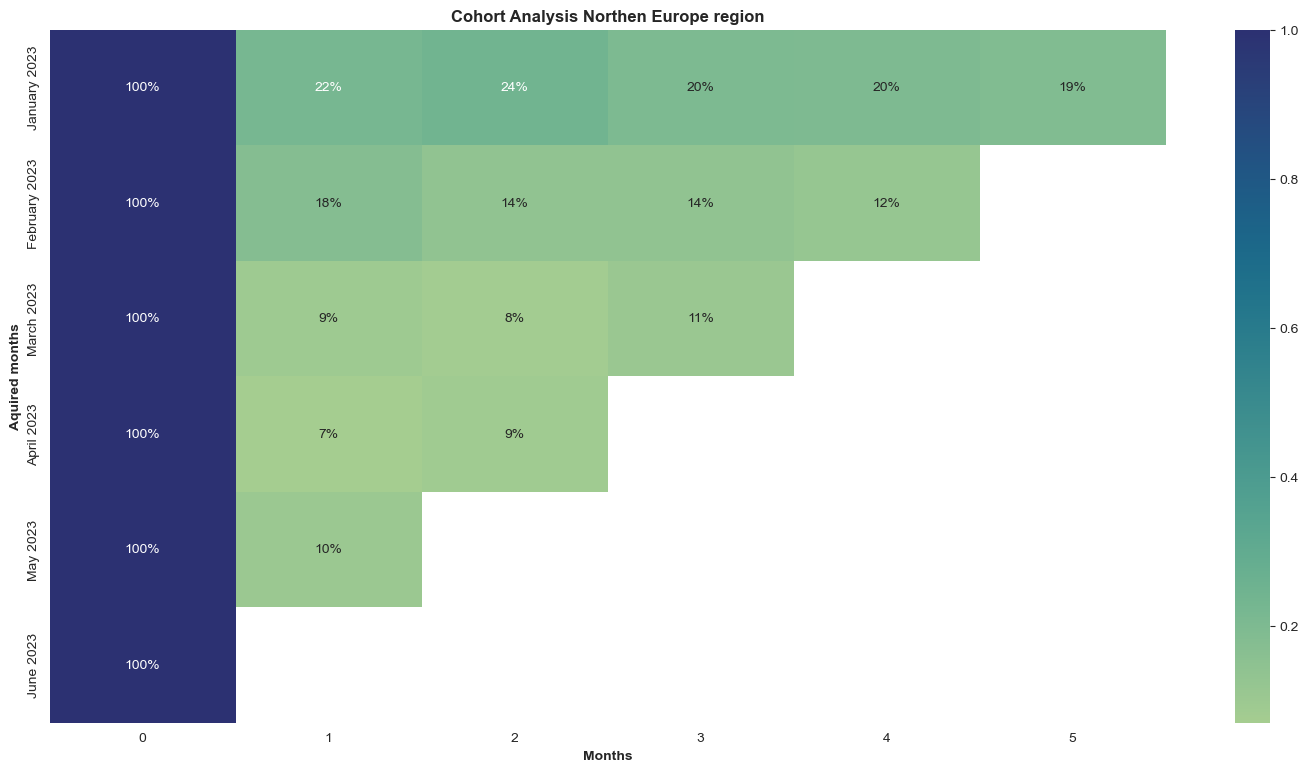

In [675]:
# we will visulalize this through a heatmap
plt.figure(figsize=(18,9))
sbn.heatmap(cohort_percent,annot=True, fmt='.0%',cmap=sbn.color_palette('crest',as_cmap=True),)
plt.xlabel('Months',fontdict={'weight':'bold'})
plt.ylabel('Aquired months',fontdict={'weight':'bold'})
plt.title("Cohort Analysis Northen Europe region",fontdict={'weight':'bold'})
plt.savefig('NE_Cohort_table.png')

#### Here we can see that Jan and Feb are descently stable but April and March has a lot of instability, the customer retention is in single digits for most of the times. We can correlate rthis with the lineplot revenue and can see that the business plunged in march and one of the reasons is the poor customer retention rate.

#### ----------Customer segmentation using Recency, Frequency, Monetory analysis-------

In [676]:
cohort_data['Close Date_dt'].max()
max_date=pd.to_datetime('2023-07-01')

In [677]:
cohort_data['recency']=(max_date-cohort_data['Close Date_dt']).dt.days
recency_table=cohort_data.groupby(['Account Name'])['recency'].min()
frequency_table=cohort_data.groupby(['Account Name'])['Close Date_dt'].nunique()
monetary_table=cohort_data.groupby(['Account Name'])['Sales Price'].sum()

In [678]:
RMF_df=pd.DataFrame({'Account':recency_table.index,'Recency_col':recency_table.values,
                     'Monetary_col':monetary_table.values,'Frequency_col':frequency_table.values})
RMF_df.head()

,Account,Recency_col,Monetary_col,Frequency_col
0,'t Lange Land Ziekenhuis (Reinier Haga Groep),134,956.00,1
1,1 Line Safety & Security Management BV,103,15900.00,1
2,1&1 Versatel Deutschland GmbH,64,157875.68,5
3,3DICOM GmbH & Co. KG,93,50057.30,1
4,3M BELGIUM - Machelen,4,341.06,1


#### We will use Kmenas clustering to perform customer segmentation


In [679]:
# before feeding to clustering, we will first select those records whcih are greter than 0
RMF_df_cl=RMF_df.query('Recency_col>0 and Monetary_col>0 and Frequency_col>0')

In [680]:
# Fisrt we will find out optimium number of clusters using elbow method.
clsut_data=RMF_df_cl.iloc[:,1:]

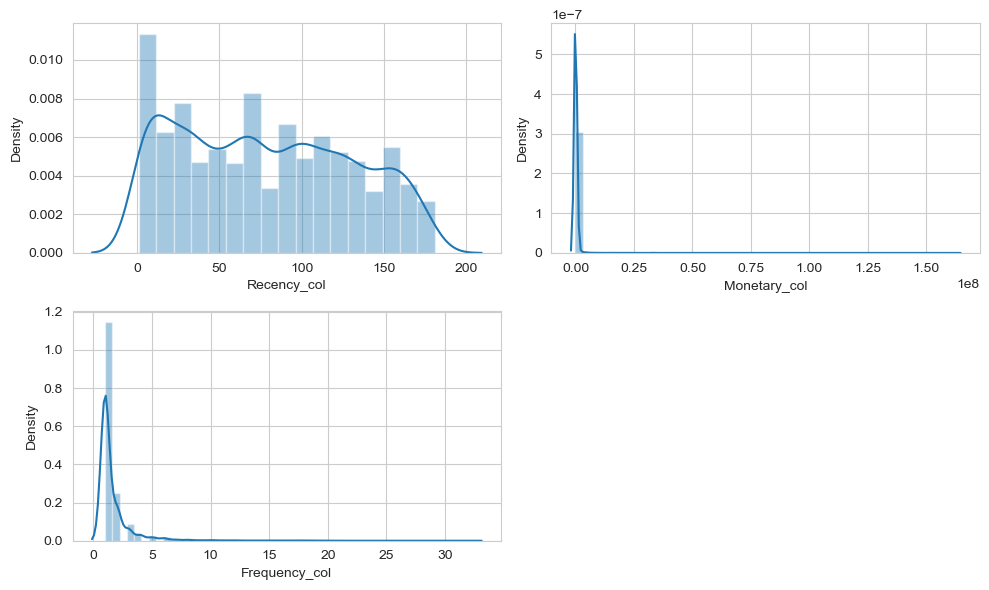

In [681]:
plt.figure(figsize=(10,6))

for i,j in enumerate(clsut_data):
    plt.subplot(2,2,i+1)
    sbn.distplot(clsut_data[j],kde=True)
    plt.tight_layout()


In [682]:
# From above graphs we can see that data is not normalized and frequency and monetary column is highly right skewed
# We will normalize the data

clsut_data_norm=clsut_data.apply(np.log,axis=1).round(2)

In [683]:
# We will scale the data befire feeding it to the clustering algorithm
std_scl=StandardScaler()
cust_data_scaled=std_scl.fit_transform(clsut_data_norm)

#### KMean clustering

In [684]:
clust_dict={}
silhoutte_dict={}
silhoutte_sample_dict={}
for i in range(2,15):
    k_means_clust=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    k_means_clust.fit(cust_data_scaled)
    predictions=k_means_clust.predict(cust_data_scaled)
    silhoutte_dict[i]=silhouette_score(cust_data_scaled,predictions)
    silhoutte_sample_dict[i]=silhouette_samples(cust_data_scaled,predictions)
    clust_dict[i]=k_means_clust.inertia_

In [685]:
# We will see if any our clusters contain any negative values
st=set()
for i in silhoutte_sample_dict.keys():
    for k in silhoutte_sample_dict[i]:
        if (np.negative(k)):
            st.add(i)
            
            
    
st        

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

Text(0, 0.5, 'WCSS')

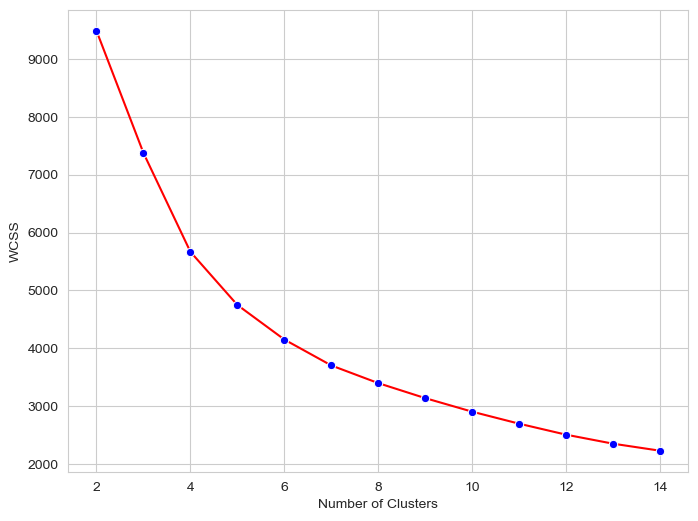

In [686]:
# We will plot the graph  to get optimum number of clsuters since all the clusters have begative values and elbow method show smoothening of curve after 4
plt.figure(figsize=(8,6))
sbn.lineplot(x=clust_dict.keys(),y=clust_dict.values(),marker='o',markerfacecolor='blue',color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [687]:
silhoutte_dict

{2: 0.4313394755552634,
 3: 0.2996350212706981,
 4: 0.33655849382176234,
 5: 0.3548332627366393,
 6: 0.3248745827965692,
 7: 0.3286085540539749,
 8: 0.3275268999110631,
 9: 0.3330368087503837,
 10: 0.30429256413577416,
 11: 0.30846304623050064,
 12: 0.31904029383412696,
 13: 0.3221936969080459,
 14: 0.3115348979888888}

In [688]:
# We will select 4 no of clusters to train our model 
k_means_clust=KMeans(n_clusters=4,max_iter=1000,random_state=42)
k_means_clust.fit(cust_data_scaled)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [689]:
RMF_df_cl['Clsuters']=k_means_clust.predict(cust_data_scaled)
RMF_df_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters
0,'t Lange Land Ziekenhuis (Reinier Haga Groep),134,956.00,1,0
1,1 Line Safety & Security Management BV,103,15900.00,1,2
2,1&1 Versatel Deutschland GmbH,64,157875.68,5,3
3,3DICOM GmbH & Co. KG,93,50057.30,1,2
4,3M BELGIUM - Machelen,4,341.06,1,1


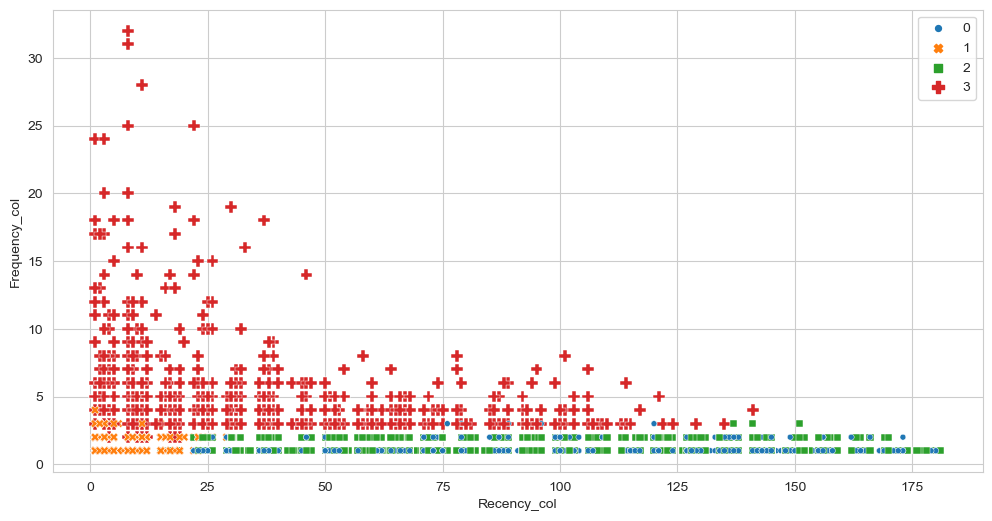

In [690]:
# We will plot the scatterplot for recency and frequency to visulaize these clusters,
#later we will plot the 3D plot as well for better visualization
plt.figure(figsize=(12,6))
sbn.scatterplot(x=RMF_df_cl['Recency_col'],y=RMF_df_cl['Frequency_col'],
                palette=sbn.color_palette("tab10"),hue=RMF_df_cl['Clsuters'],style=RMF_df_cl['Clsuters']
               ,size=RMF_df_cl['Clsuters'])
plt.legend()

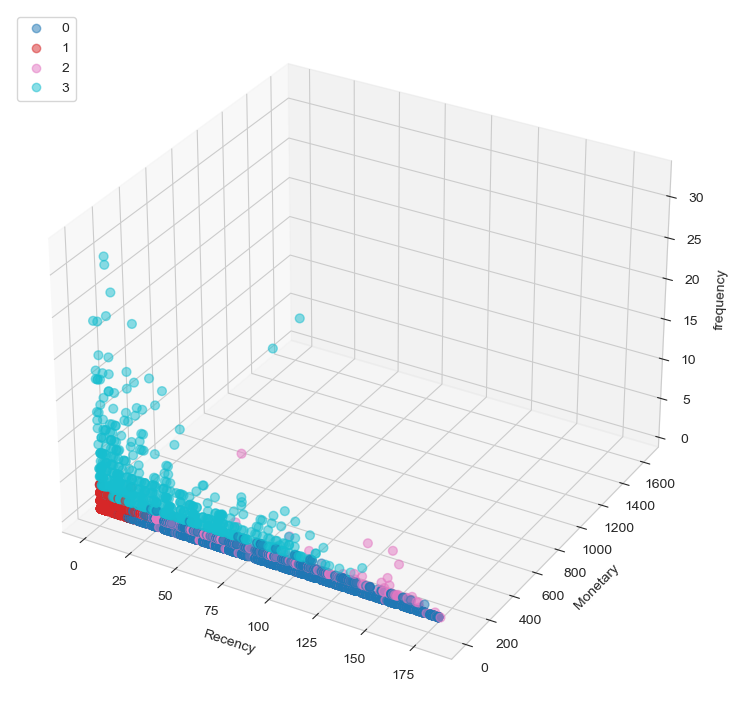

In [691]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection ='3d')
cmap = ListedColormap(sbn.color_palette("tab10").as_hex())
sc=ax.scatter(RMF_df_cl['Recency_col'],round(RMF_df_cl['Monetary_col']/100000,2),RMF_df_cl['Frequency_col'],
           depthshade=True,s=40,c=RMF_df_cl['Clsuters'],cmap=cmap,marker='o',alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('frequency')
plt.legend(*sc.legend_elements(), loc=2)

#### From bove graph we can see that the customer represented by sky blue dots which have good frequency, they are regular buyers with some of the biggest value orders, so lets categorize them as promoters(cluster 3)
#### The customer represented by Pink dots have shwon good recency Will categorize them as supporters(cluster 2)
#### The customer represented by Red dots have shown recency and their frequency is also decent, we will categorize them as good customers(cluster 0)
#### finally customer represented by dark blue dots, have poor frequency,their order values are very small and also have streched recency.They are neutral customers(cluster 1)

#### We will Assign segment to the customer

In [692]:
def Assign_cust_seg(x):
    if x==0:
        return 'Good'
    elif x==1:
        return 'Neutral'
    elif x==3:
        return 'Promoter'
    else:
        return 'Supporter'

In [693]:
RMF_df_cl['Cust_segment']=RMF_df_cl['Clsuters'].apply(Assign_cust_seg)

In [694]:
RMF_df_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters,Cust_segment
0,'t Lange Land Ziekenhuis (Reinier Haga Groep),134,956.00,1,0,Good
1,1 Line Safety & Security Management BV,103,15900.00,1,2,Supporter
2,1&1 Versatel Deutschland GmbH,64,157875.68,5,3,Promoter
3,3DICOM GmbH & Co. KG,93,50057.30,1,2,Supporter
4,3M BELGIUM - Machelen,4,341.06,1,1,Neutral


##### ------------------------------------------------------------------------------------------------

### 2.LATAM

In [695]:
LATAM_region=sales_data[sales_data['Business Region']=='LATAM']

In [696]:
# Lets examine which countries fall in LATAM  region
LATAM_region['BV_Country'].unique()

array(['Puerto Rico', 'Colombia', 'Mexico', 'Argentina', 'Brazil',
       'Chile', 'Costa Rica', 'Peru', 'Panama', 'Bahamas'], dtype=object)

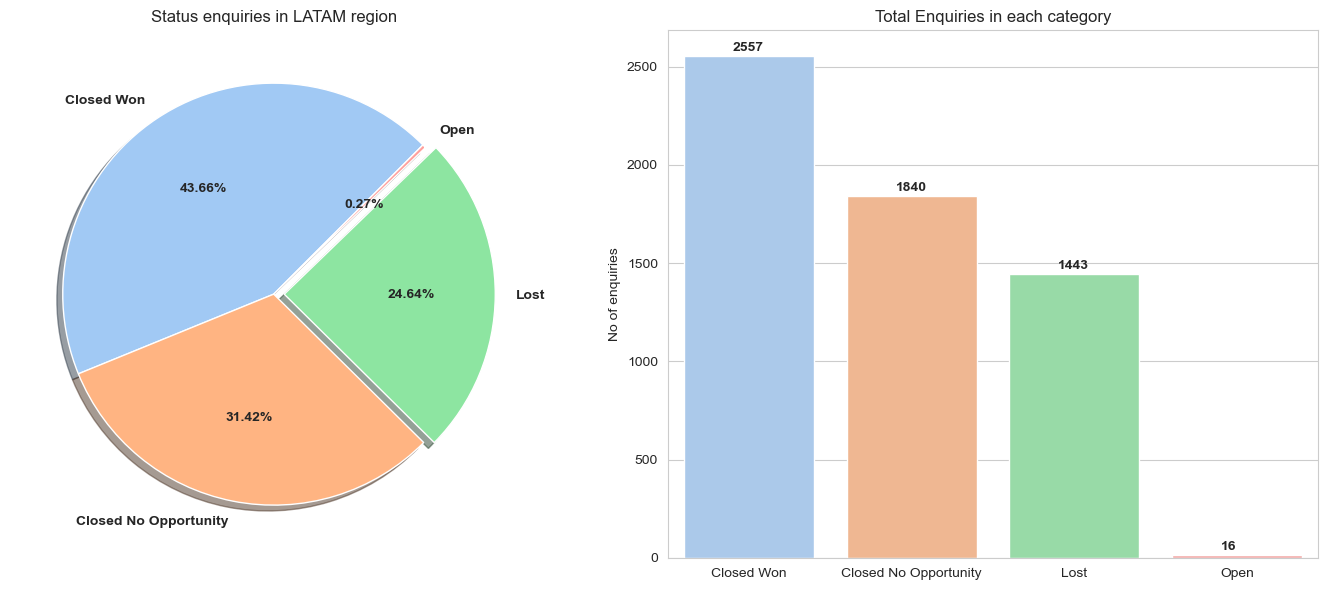

In [697]:
# Lets see how  distribution of enquiries has been

size=LATAM_region['STATUS'].value_counts()
label=LATAM_region['STATUS'].value_counts().index
explode=[0,0,0.05,0]

sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("pastel"),
        autopct='%1.2f%%',shadow=True,startangle=45,radius=1,textprops={'weight':'bold'})
plt.title("Status enquiries in LATAM region")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("pastel"))
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("No of enquiries")
for i,j in enumerate(LATAM_region['STATUS'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### LATAM region has a win rate of 43.66 % with just almost 24.64% loss

#### We will see what is the Business Distribution for the orders which have been won for LATAM region

In [698]:
LATAM_win_data=LATAM_region[LATAM_region['STATUS']=='Closed Won']

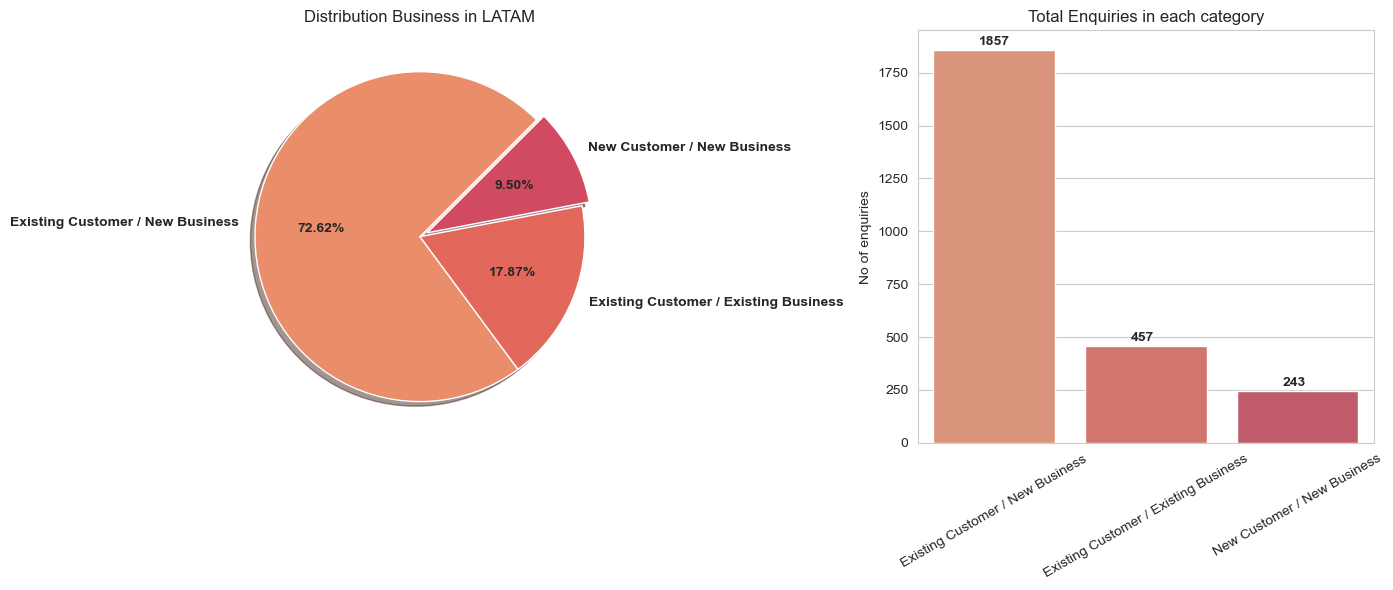

In [699]:

size=LATAM_win_data['New / Existing Business'].value_counts()
label=LATAM_win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("flare"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business in LATAM")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("flare"))
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(LATAM_win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Out of total enquiries which were converted, 72.62% were for the new business given by existing customers

#### Lets examine distribution of business revenuewise for LATAM

In [700]:
revenue_lt=LATAM_win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue_lt=round(revenue_lt/1000000,2) # converting to million USD

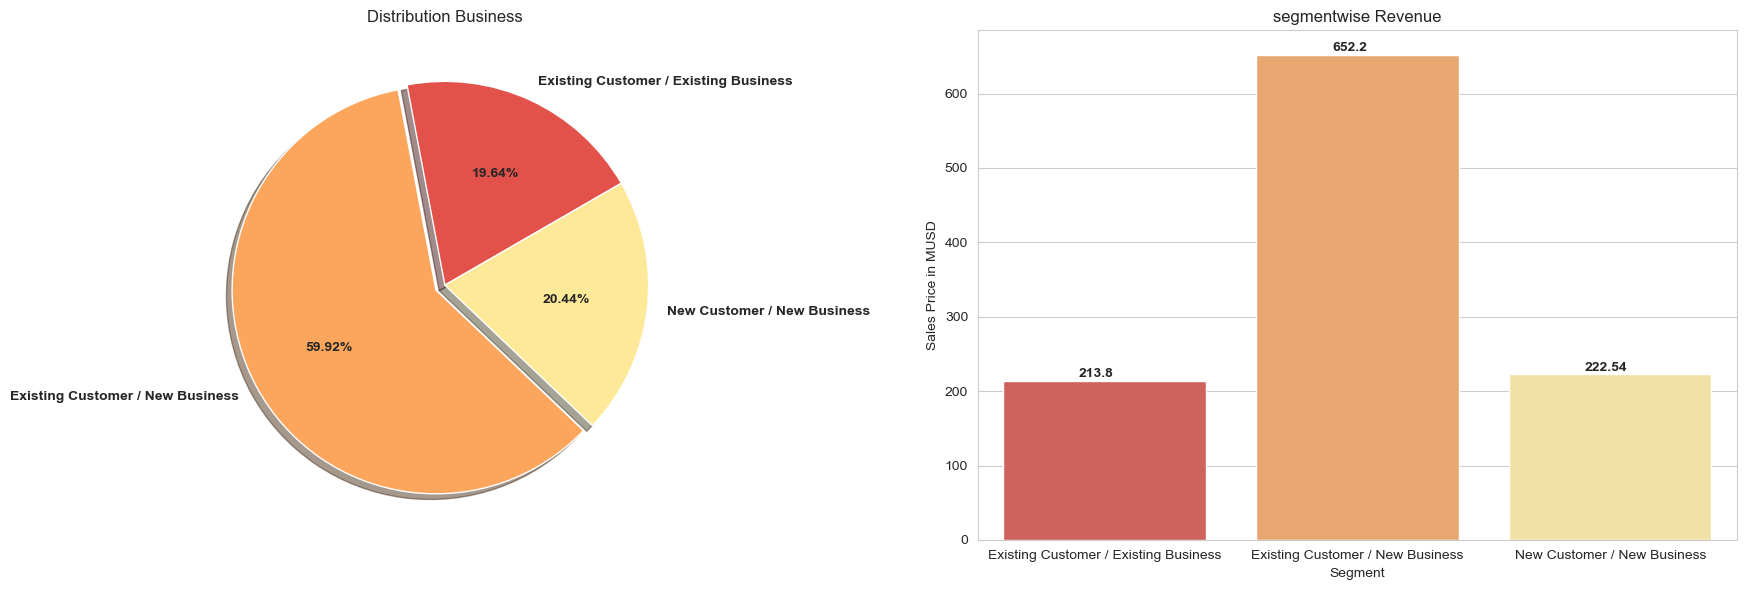

In [701]:
size=revenue_lt
label=revenue_lt.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=30,textprops={'weight':'bold'})
plt.title("Distribution Business")

plt.subplot(1,2,2)
sbn.barplot(x=revenue_lt.index,y=revenue_lt,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue_lt):
    plt.text(i-0.1,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue")
plt.tight_layout()

#### We can see that almost 60% of revenue has come from  new business given by existing customer and approximately 80% of revenue is given by existing customer. 20% business is given by new customers

In [702]:
lt_country=LATAM_win_data.groupby(by='BV_Country')['Sales Price'].agg('sum')
lt_country=lt_country/1000000
lt_country=round((lt_country/lt_country.sum())*100,2)
lt_country=lt_country.sort_values(ascending=False)

Text(0.5, 1.0, 'Countrywise percent Revenue')

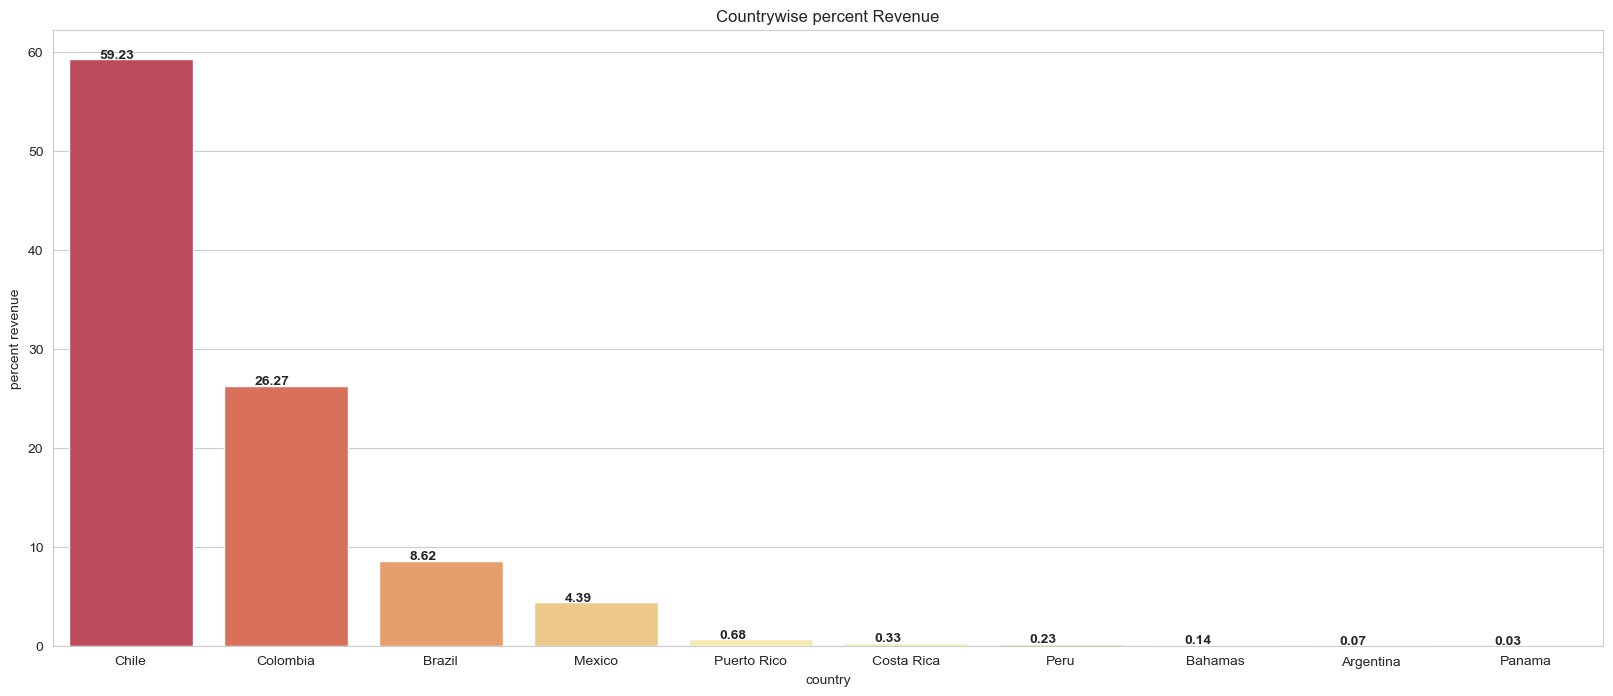

In [703]:
plt.figure(figsize=(20,8))
sbn.barplot(x=lt_country.index,y=lt_country,palette="Spectral")
for i,j in enumerate(lt_country):
    plt.text(i-0.2,j+0.1,j,fontdict={'weight':'bold'})
plt.xlabel("country")
plt.ylabel("percent revenue")
plt.title("Countrywise percent Revenue")

#### Chile itself was responsible for 59.23% of the revenue and chile and colombia combingly contribute to 86% of the total revenue of the LATAM region

#### We will see some important statistics

In [704]:
mean_days_lt=np.mean((LATAM_win_data['Close Date_dt']-LATAM_win_data['Created_Date_dt'])).days
min_days_lt=min((LATAM_win_data['Close Date_dt']-LATAM_win_data['Created_Date_dt'])).days
max_days_lt=max((LATAM_win_data['Close Date_dt']-LATAM_win_data['Created_Date_dt'])).days
max_revenue_lt=max(LATAM_win_data['Sales Price'])
min_revenue_lt=min(LATAM_win_data['Sales Price'])

In [705]:
monthwise_revenue_lt=LATAM_win_data.groupby(by='month_closed_dt')['Sales Price'].agg('sum')
monthwise_revenue_lt=round(monthwise_revenue_lt/1000000,2)

In [706]:
Ne_df_lt=pd.DataFrame({'Description':['Avg Days for closure','Min days for closure','Max days for closure','Highest grossing month/revenue','Lowest grossing month/revenue','Avg revenue','Max_order_val','Min_order_val'],
                    'Values':[mean_days_lt,min_days_lt,max_days_lt,(monthwise_revenue_lt[monthwise_revenue_lt==monthwise_revenue_lt.max()].index.values[0],monthwise_revenue_lt.max())
                    ,(monthwise_revenue_lt[monthwise_revenue_lt==monthwise_revenue_lt.min()].index.values[0],monthwise_revenue_lt.min()),monthwise_revenue_lt.mean(),max_revenue_lt,min_revenue_lt]})
Ne_df_lt.index=Ne_df_lt.Description
Ne_df_lt.drop('Description', axis=1,inplace=True)

In [707]:
Ne_df_lt

,Values
Description,
Avg Days for closure,100
Min days for closure,-78
Max days for closure,2209
Highest grossing month/revenue,"(3, 343.61)"
Lowest grossing month/revenue,"(1, 57.97)"
Avg revenue,181.423333
Max_order_val,207118144.0
Min_order_val,-563851.89


Text(0.8, 183.42333333333332, 'Avg= 181')

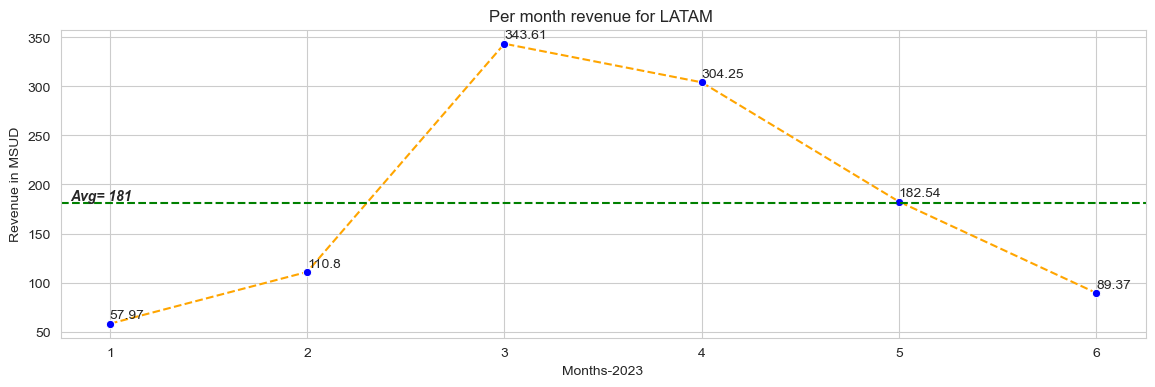

In [708]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=monthwise_revenue_lt.index,y=monthwise_revenue_lt,marker='o', markerfacecolor='blue',markersize=6,color='orange',linestyle='dashed',linewidth=1.5)
plt.axhline(monthwise_revenue_lt.mean(),color='green',linestyle='dashed',label='Avg line')
plt.xlabel("Months-2023")
plt.ylabel("Revenue in MSUD")
plt.title("Per month revenue for LATAM ")
for i,j in enumerate(monthwise_revenue_lt):
    plt.text(i+1,j+5,j)
plt.text(0.8,monthwise_revenue_lt.mean()+2,"Avg= "+str(round(monthwise_revenue_lt.mean())),fontdict={'weight':'bold','style':'italic'})

#### The growth from first month to third month is whooping 492% from 57.97 to 343.61 MUSD. But then business declines with almost the same rate and closes the Q2 last month at 89.37 MUSD

#### We will perform cohort analysis

In [709]:
cohort_data_LATAM=LATAM_win_data[['Account Name','Close Date_dt','Sales Price']]

In [710]:
# getting the month in whcih customer made the first purchase
cohort_data_LATAM['Cust_aquire_mnth']=cohort_data_LATAM.groupby(['Account Name'])['Close Date_dt'].transform('min')
cohort_data_LATAM.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth
11,Aires Y Servicios,2023-01-23,866.00,2023-01-23
12,Aires Y Servicios,2023-01-23,2486.00,2023-01-23
29,Parque de la Tecnologia Electronica SA de CV,2023-06-30,5258.61,2023-02-27
33,Industrias y Representaciones Garvel,2023-02-23,85781.20,2023-02-23
56,Moño Azul,2023-06-01,4650.00,2023-06-01


In [711]:
# getting the month and year for acquired month and then for each month in which order was closed
close_month,close_year=get_yr_mnt(cohort_data_LATAM,'Close Date_dt')
cust_month,cust_year=get_yr_mnt(cohort_data_LATAM,'Cust_aquire_mnth')

In [712]:
# Now we will see for how long that customer is active
cohort_data_LATAM['active_months']=(close_month-cust_month)+12*(close_year-cust_year)
cohort_data_LATAM.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth,active_months
11,Aires Y Servicios,2023-01-23,866.00,2023-01-23,0
12,Aires Y Servicios,2023-01-23,2486.00,2023-01-23,0
29,Parque de la Tecnologia Electronica SA de CV,2023-06-30,5258.61,2023-02-27,4
33,Industrias y Representaciones Garvel,2023-02-23,85781.20,2023-02-23,0
56,Moño Azul,2023-06-01,4650.00,2023-06-01,0


In [713]:
cohort_data_LATAM['Cust_aquire_mnth_dt']=cohort_data_LATAM['Cust_aquire_mnth'].apply(get_date)

In [714]:
#now we will create a table to how many customers for how long active
cust_table_LATAM=cohort_data_LATAM.groupby(['Cust_aquire_mnth_dt','active_months'])['Account Name'].nunique()
# We will reset the index
cust_table_LATAM=cust_table_LATAM.reset_index()
cust_table_LATAM.head()

,Cust_aquire_mnth_dt,active_months,Account Name
0,2023-01-01,0,223
1,2023-01-01,1,52
2,2023-01-01,2,53
3,2023-01-01,3,50
4,2023-01-01,4,45


In [715]:
# creating a pivot chart
cust_pvt_LATAM=pd.pivot_table(cust_table_LATAM,index='Cust_aquire_mnth_dt',columns='active_months',values='Account Name')
cust_pvt_LATAM.head()

active_months,0,1,2,3,4,5
Cust_aquire_mnth_dt,,,,,,
2023-01-01,223.0,52.0,53.0,50.0,45.0,46.0
2023-02-01,186.0,39.0,32.0,38.0,37.0,NaN
2023-03-01,175.0,23.0,23.0,19.0,NaN,NaN
2023-04-01,145.0,27.0,20.0,NaN,NaN,NaN
2023-05-01,166.0,35.0,NaN,NaN,NaN,NaN


In [716]:
# We will see this data percentagewise
cohort_percent_LATAM=cust_pvt_LATAM.divide(cust_pvt_LATAM.iloc[:,0],axis=0)
cohort_percent_LATAM.index=cohort_percent_LATAM.index.strftime('%B %Y')

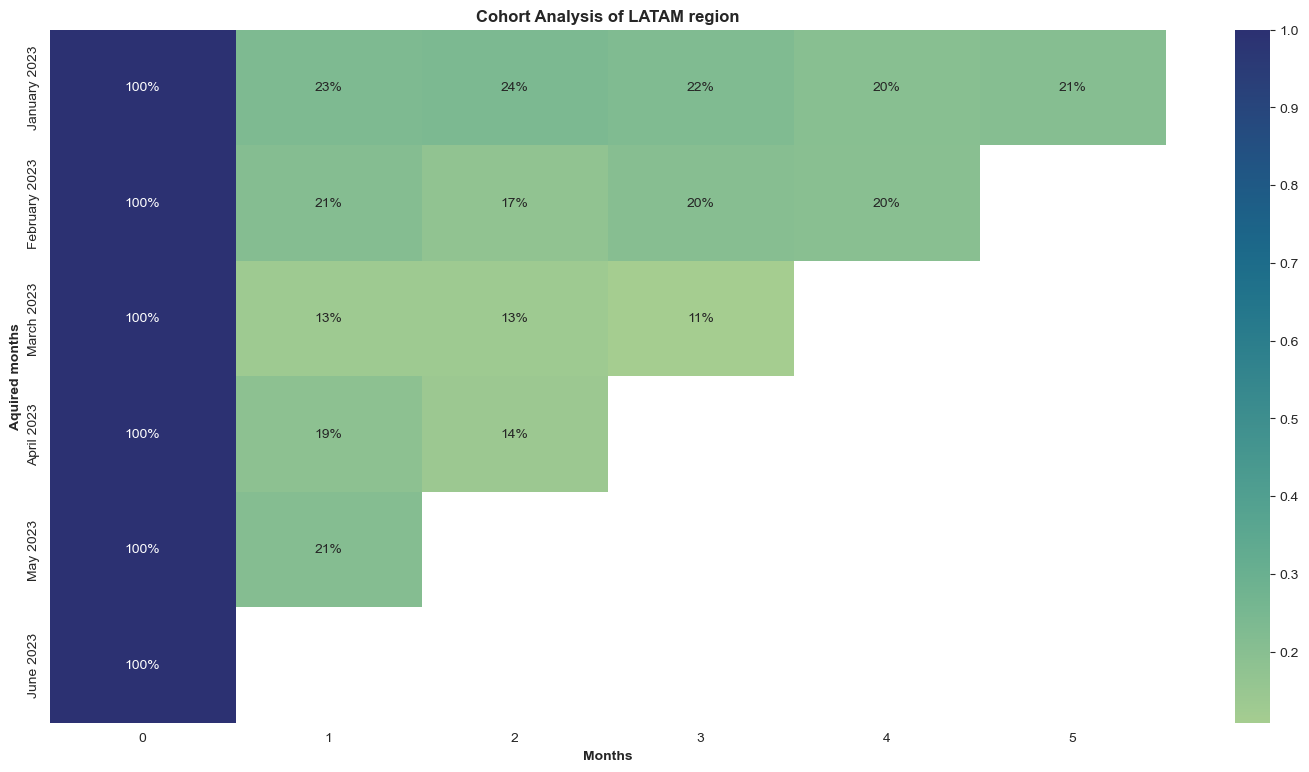

In [717]:
# we will visulalize this through a heatmap
plt.figure(figsize=(18,9))
sbn.heatmap(cohort_percent_LATAM,annot=True, fmt='.0%',cmap=sbn.color_palette('crest',as_cmap=True),)
plt.xlabel('Months',fontdict={'weight':'bold'})
plt.ylabel('Aquired months',fontdict={'weight':'bold'})
plt.title("Cohort Analysis of LATAM region",fontdict={'weight':'bold'})
plt.savefig('LATAM_Cohort_table.png')

#### Here , like Northern europe Jan is stable, there is a slight hiccup in feb. March is pretty unstable

#### ----------Customer segmentation using Recency, Frequency, Monetory analysis-------

In [718]:
cohort_data_LATAM['Close Date_dt'].max()
max_date=pd.to_datetime('2023-07-01')

In [719]:
cohort_data_LATAM['recency']=(max_date-cohort_data_LATAM['Close Date_dt']).dt.days
recency_table=cohort_data_LATAM.groupby(['Account Name'])['recency'].min()
frequency_table=cohort_data_LATAM.groupby(['Account Name'])['Close Date_dt'].nunique()
monetary_table=cohort_data_LATAM.groupby(['Account Name'])['Sales Price'].sum()

In [720]:
RMF_df_LATAM=pd.DataFrame({'Account':recency_table.index,'Recency_col':recency_table.values,
                     'Monetary_col':monetary_table.values,'Frequency_col':frequency_table.values})
RMF_df_LATAM.head()

,Account,Recency_col,Monetary_col,Frequency_col
0,(SISA) Sistema Inteligente de Aire Acondiciona...,33,173170.12,2
1,3M PURIFICATION S DE R.L. DE C.V.,23,20700.00,1
2,A Blasquez E Refrigeracion,107,360.77,1
3,A'doro SA,2,1576.00,1
4,ABENGOA CHILE,171,3003.00,1


#### We will use Kmeans for customer segmentation

In [721]:
# before feeding to clustering, we will first select those records whcih are greter than 0
RMF_df_LATAM_cl=RMF_df_LATAM.query('Recency_col>0 and Monetary_col>0 and Frequency_col>0')

In [722]:
# Fisrt we will find out optimium number of clusters using elbow method.
clsut_data_LATAM=RMF_df_LATAM_cl.iloc[:,1:]

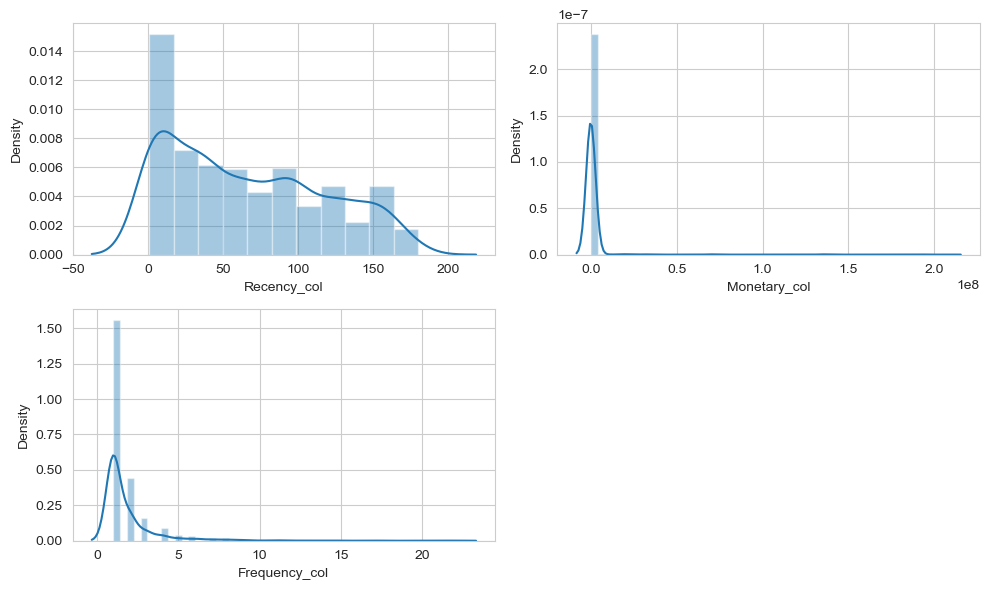

In [723]:
# Lets check if our data is skewed
plt.figure(figsize=(10,6))

for i,j in enumerate(clsut_data_LATAM):
    plt.subplot(2,2,i+1)
    sbn.distplot(clsut_data_LATAM[j],kde=True)
    plt.tight_layout()


In [724]:
# From above graphs we can see that data is not normalized and frequency and monetary column is highly right skewed
# We will normalize the data

clsut_data_norm_LATAM=clsut_data_LATAM.apply(np.log,axis=1).round(2)

In [725]:
# We will scale the data befire feeding it to the clustering algorithm
std_scl_lt=StandardScaler()
cust_data_scaled_lt=std_scl_lt.fit_transform(clsut_data_norm_LATAM)

In [726]:
clust_dict_lt={}
silhoutte_dict_lt={}
silhoutte_sample_dict_lt={}
for i in range(2,15):
    k_means_clust=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    k_means_clust.fit(cust_data_scaled_lt)
    predictions_lt=k_means_clust.predict(cust_data_scaled_lt)
    silhoutte_dict_lt[i]=silhouette_score(cust_data_scaled_lt,predictions_lt)
    silhoutte_sample_dict_lt[i]=silhouette_samples(cust_data_scaled_lt,predictions_lt)
    clust_dict_lt[i]=k_means_clust.inertia_

In [727]:
# We will see if any our clusters contain any negative values
st_lt=set()
for i in silhoutte_sample_dict_lt.keys():
    for k in silhoutte_sample_dict_lt[i]:
        if (np.negative(k)):
            st_lt.add(i)
            
            
    
print(st_lt)       

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


Text(0, 0.5, 'WCSS')

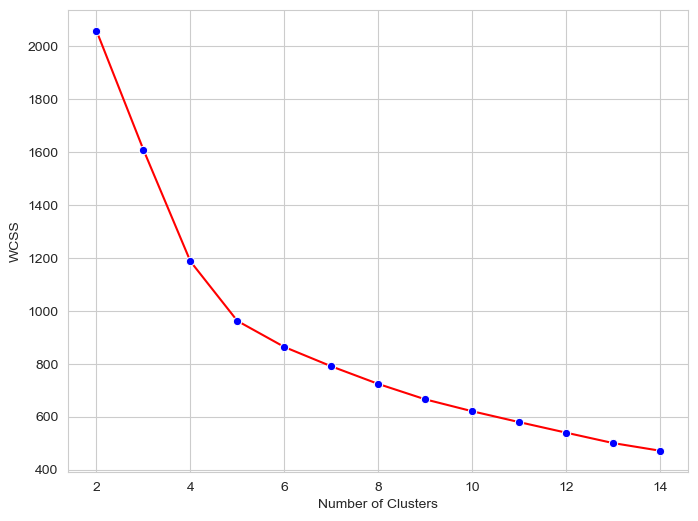

In [728]:
# We will plot the graph  to get optimum number of clsuters since all the clusters have begative values and elbow method show smoothening of curve after 4
plt.figure(figsize=(8,6))
sbn.lineplot(x=clust_dict_lt.keys(),y=clust_dict_lt.values(),marker='o',markerfacecolor='blue',color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [729]:
silhoutte_dict_lt

{2: 0.40930146144175394,
 3: 0.2936907786208699,
 4: 0.3376553213836101,
 5: 0.3755526691981406,
 6: 0.31901335712350165,
 7: 0.31077900838779876,
 8: 0.3139145360067189,
 9: 0.3111581217895257,
 10: 0.31728871058122243,
 11: 0.2962214108740904,
 12: 0.30309410291764277,
 13: 0.3230841030843531,
 14: 0.3224850869329924}

In [730]:
# We will select 4 no of clusters to train our model 
k_means_clust=KMeans(n_clusters=4,max_iter=1000,random_state=42)
k_means_clust.fit(cust_data_scaled_lt)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [731]:
RMF_df_LATAM_cl['Clsuters']=k_means_clust.predict(cust_data_scaled_lt)
RMF_df_LATAM_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters
0,(SISA) Sistema Inteligente de Aire Acondiciona...,33,173170.12,2,1
1,3M PURIFICATION S DE R.L. DE C.V.,23,20700.00,1,1
2,A Blasquez E Refrigeracion,107,360.77,1,2
3,A'doro SA,2,1576.00,1,0
4,ABENGOA CHILE,171,3003.00,1,2


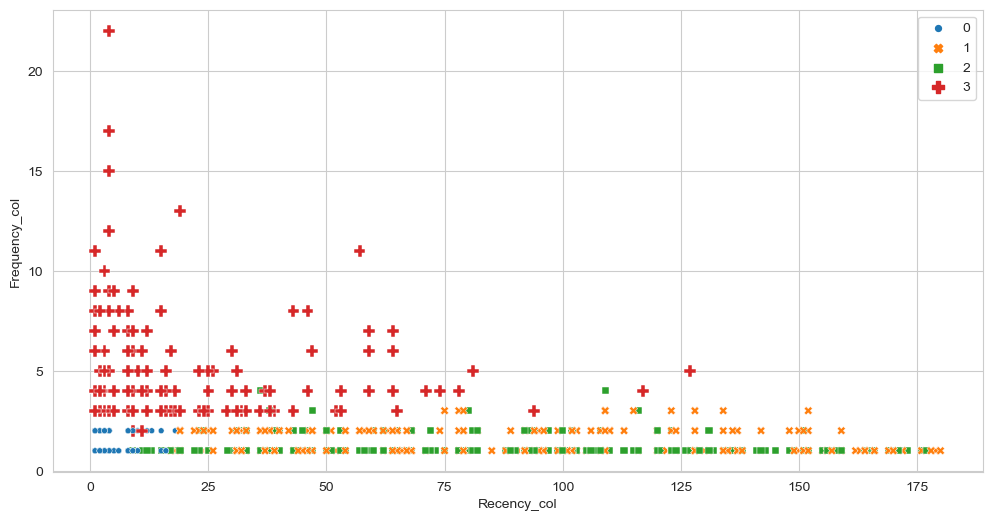

In [732]:
# We will plot the scatterplot for recency and frequency to visulaize these clusters,
#later we will plot the 3D plot as well for better visualization
plt.figure(figsize=(12,6))
sbn.scatterplot(x=RMF_df_LATAM_cl['Recency_col'],y=RMF_df_LATAM_cl['Frequency_col'],
                palette=sbn.color_palette("tab10"),hue=RMF_df_LATAM_cl['Clsuters'],style=RMF_df_LATAM_cl['Clsuters']
               ,size=RMF_df_LATAM_cl['Clsuters'])
plt.legend()

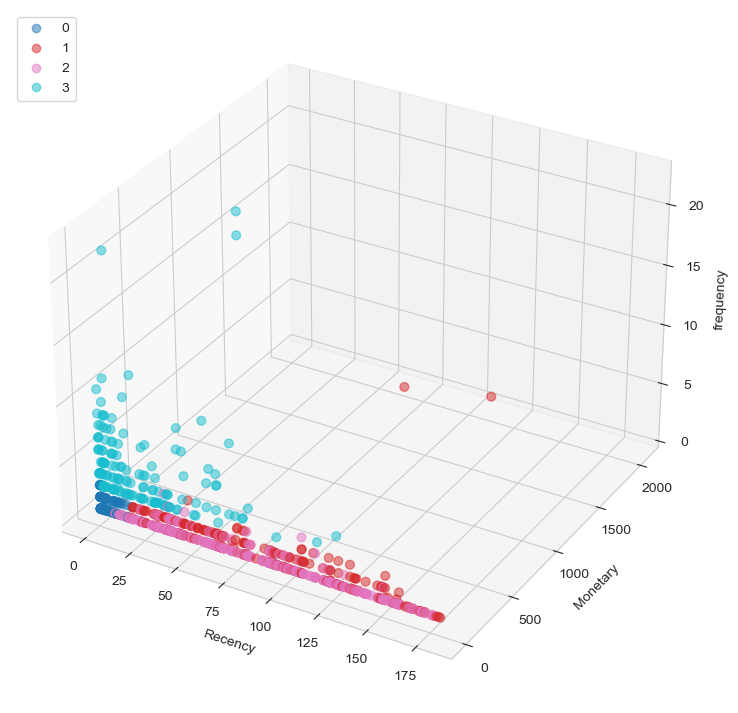

In [733]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection ='3d')
cmap = ListedColormap(sbn.color_palette("tab10").as_hex())
sc=ax.scatter(RMF_df_LATAM_cl['Recency_col'],round(RMF_df_LATAM_cl['Monetary_col']/100000,2),RMF_df_LATAM_cl['Frequency_col'],
           depthshade=True,s=40,c=RMF_df_LATAM_cl['Clsuters'],cmap=cmap,marker='o',alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('frequency')
plt.legend(*sc.legend_elements(), loc=2)

#### The customers represented by sky blue dots have shown recency, they have descent frequency and they have given some descent amount of business. We will mark them as promoters(cluster 3)
#### The customers represented by red dots have given two largest orders and recency and frequency is descent. We will categorize them as supporters(cluster 1)
#### The customers represented by dark blue dots have descent recency score lets categorize them as good customers(cluster 0)
#### The customers represented by pink dots have streched recency and their frequency also not that great, they are neutral(cluster 2)

#### We will assign customer segment to the customers

In [734]:
def Assign_cust_seg_LATAM(x):
    if x==0:
        return 'Good'
    elif x==2:
        return 'Neutral'
    elif x==3:
        return 'Promoter'
    else:
        return 'Supporter'

In [735]:
RMF_df_LATAM_cl['Cust_segment']=RMF_df_LATAM_cl['Clsuters'].apply(Assign_cust_seg_LATAM)

In [736]:
RMF_df_LATAM_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters,Cust_segment
0,(SISA) Sistema Inteligente de Aire Acondiciona...,33,173170.12,2,1,Supporter
1,3M PURIFICATION S DE R.L. DE C.V.,23,20700.00,1,1,Supporter
2,A Blasquez E Refrigeracion,107,360.77,1,2,Neutral
3,A'doro SA,2,1576.00,1,0,Good
4,ABENGOA CHILE,171,3003.00,1,2,Neutral


##### ------------------------------------------------------------------------------------------------

### 3.UK&I

In [737]:
UK_I_region=sales_data[sales_data['Business Region']=='UK&I']

In [738]:
# Lets examine which countries fall in UK&I region
UK_I_region['BV_Country'].unique()

array(['United Kingdom', 'Ireland'], dtype=object)

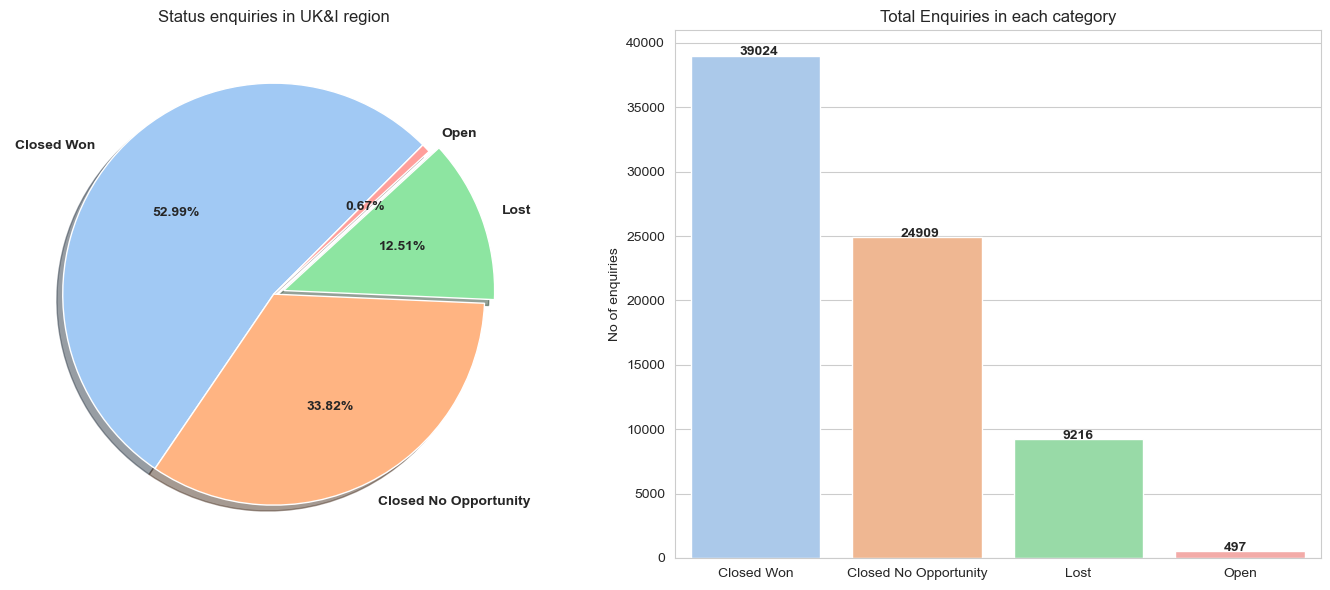

In [739]:
# Lets see how  distribution of enquiries has been

size=UK_I_region['STATUS'].value_counts()
label=UK_I_region['STATUS'].value_counts().index
explode=[0,0,0.05,0]

sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("pastel"),
        autopct='%1.2f%%',shadow=True,startangle=45,radius=1,textprops={'weight':'bold'})
plt.title("Status enquiries in UK&I region")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("pastel"))
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("No of enquiries")
for i,j in enumerate(UK_I_region['STATUS'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### UK&I region has a win rate of 53 % with just 12.51% loss

#### We will see what is the Business Distribution for the orders which have been won for UK&I region

In [740]:
UK_I_win_data=UK_I_region[UK_I_region['STATUS']=='Closed Won']

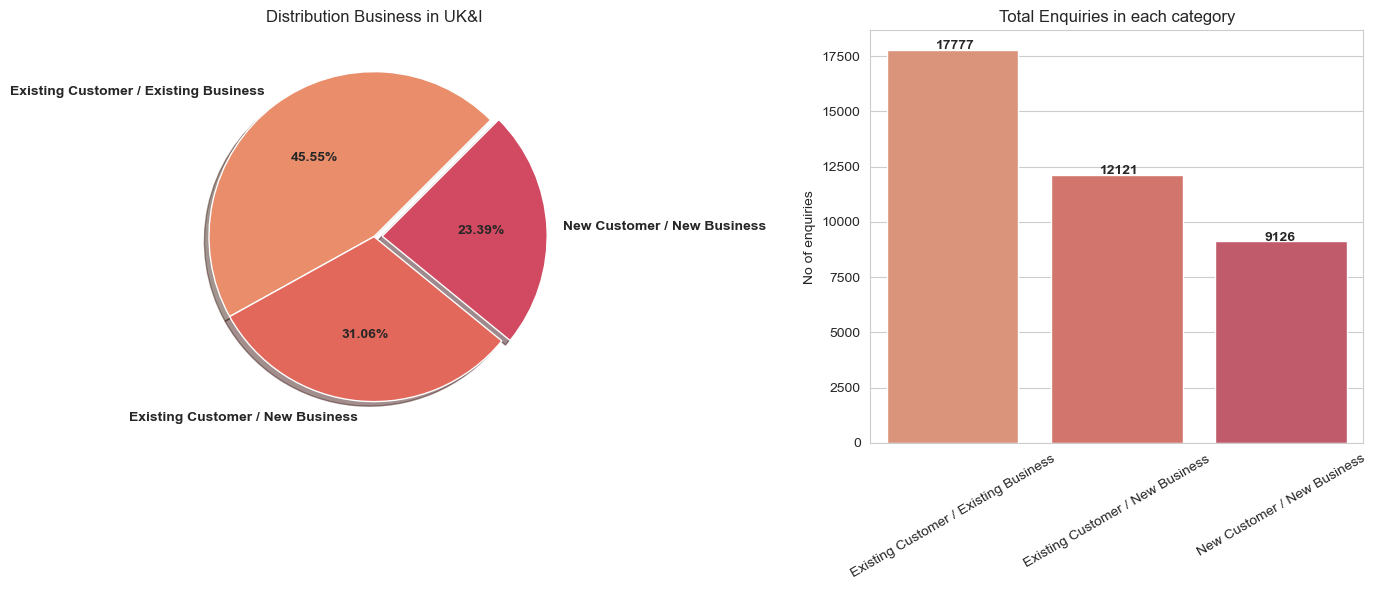

In [741]:

size=UK_I_win_data['New / Existing Business'].value_counts()
label=UK_I_win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("flare"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business in UK&I")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("flare"))
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(UK_I_win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Of total enquiries in UK&I, 45.55% are VOs, 23.39% have come from new customers. Existing customer gave almost 76% of the enquiries which were converted into business.

#### Lets examine distribution of business revenuewise for UK&I

In [742]:
revenue_Uk=UK_I_win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue_Uk=round(revenue_Uk/1000000,2) # converting to million USD

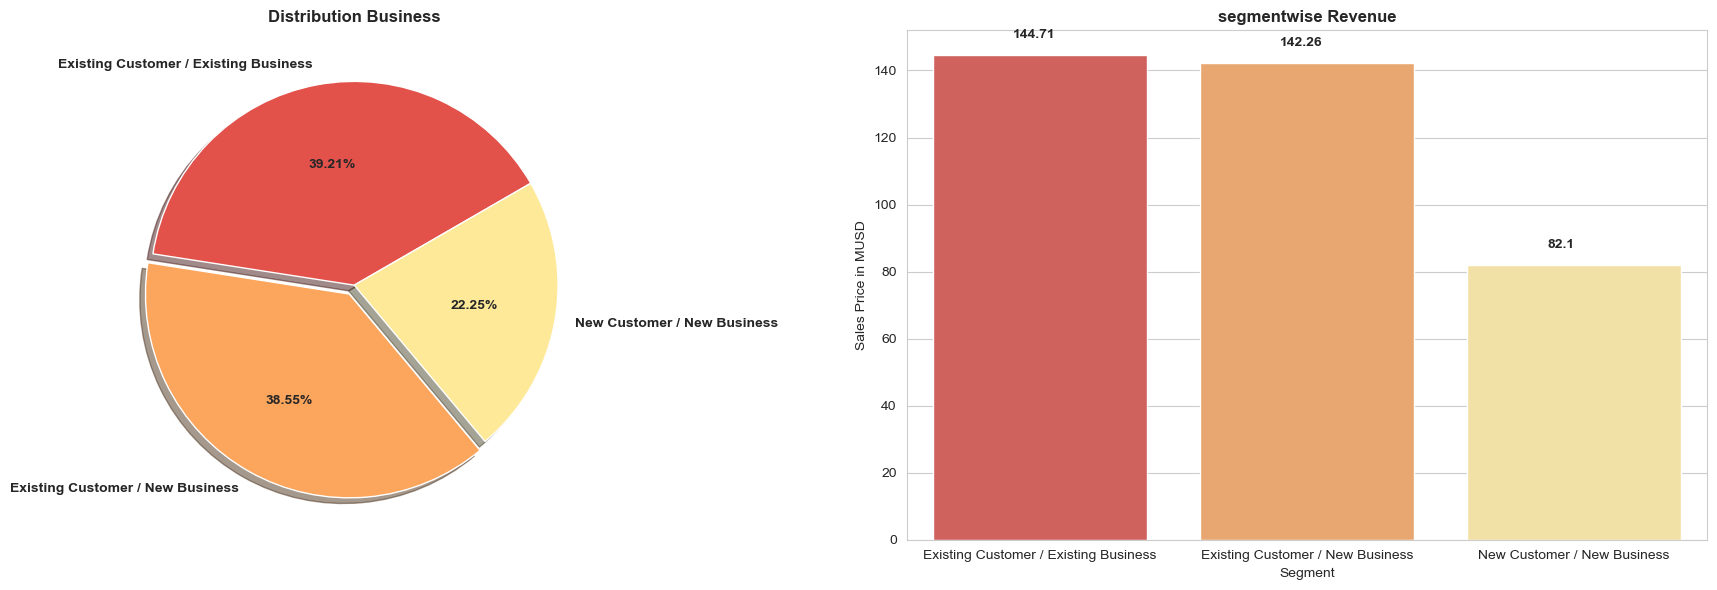

In [743]:
size=revenue_Uk
label=revenue_Uk.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=30,textprops={'weight':'bold'})
plt.title("Distribution Business",fontdict={'weight':'bold'})

plt.subplot(1,2,2)
sbn.barplot(x=revenue_Uk.index,y=revenue_Uk,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue_Uk):
    plt.text(i-0.1,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue",fontdict={'weight':'bold'})
plt.tight_layout()

#### We observe that the revenue generated from Existing cutomer is almost 78%. 38.55% of that has come from new projects given by existing customer. New customers contributed aboit 22.255 of revenue

In [744]:
Uk_country=UK_I_win_data.groupby(by='BV_Country')['Sales Price'].agg('sum')
Uk_country=Uk_country/1000000
Uk_country=round((Uk_country/Uk_country.sum())*100,2)
Uk_country=Uk_country.sort_values(ascending=False)

Text(0.5, 1.0, 'Countrywise percent Revenue')

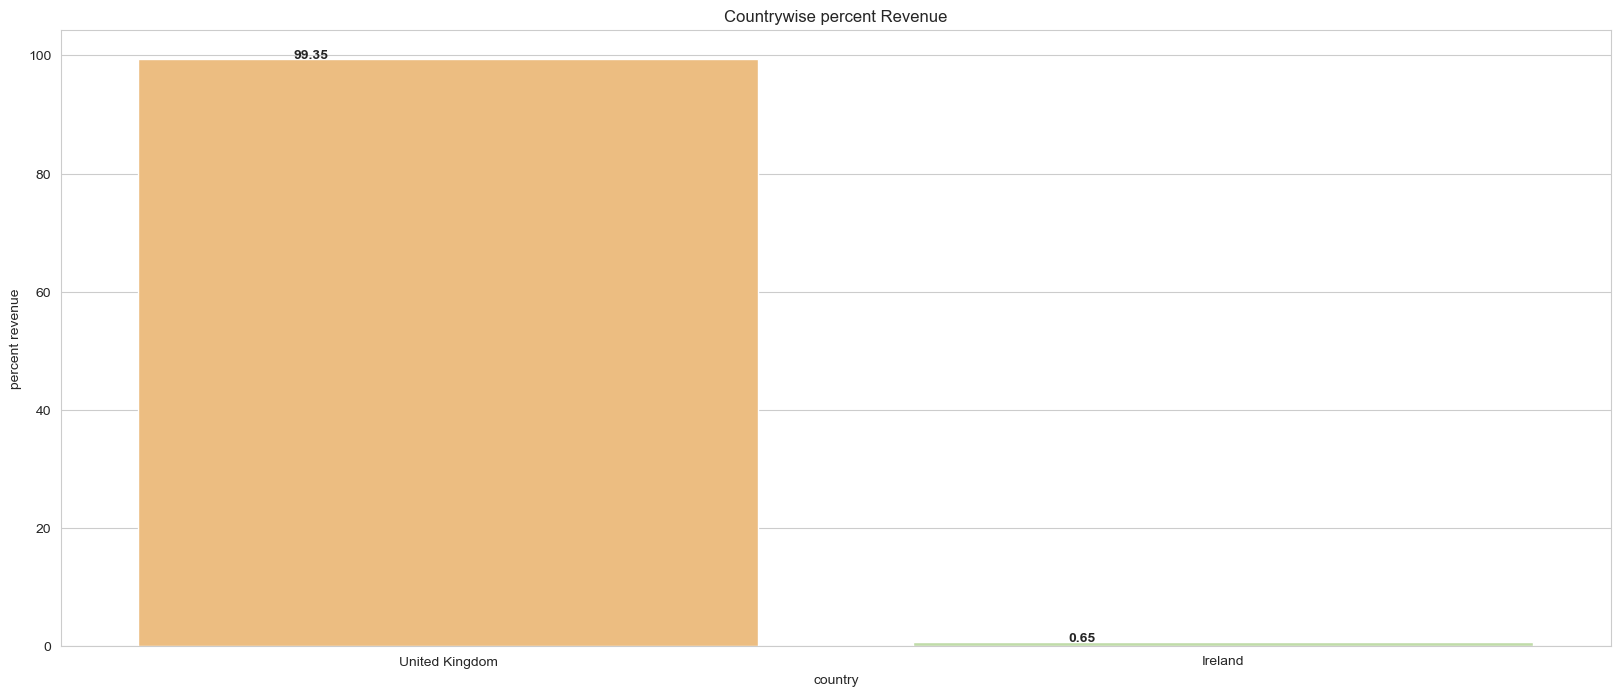

In [745]:
plt.figure(figsize=(20,8))
sbn.barplot(x=Uk_country.index,y=Uk_country,palette="Spectral")
for i,j in enumerate(Uk_country):
    plt.text(i-0.2,j+0.1,j,fontdict={'weight':'bold'})
plt.xlabel("country")
plt.ylabel("percent revenue")
plt.title("Countrywise percent Revenue")

#### We can see that UK has contributed to almost all revenue in that region

#### We will see some important statistics

In [746]:
mean_days_uk=np.mean((UK_I_win_data['Close Date_dt']-UK_I_win_data['Created_Date_dt'])).days
min_days_uk=min((UK_I_win_data['Close Date_dt']-UK_I_win_data['Created_Date_dt'])).days
max_days_uk=max((UK_I_win_data['Close Date_dt']-UK_I_win_data['Created_Date_dt'])).days
max_revenue_uk=max(UK_I_win_data['Sales Price'])
min_revenue_uk=min(UK_I_win_data['Sales Price'])

In [747]:
monthwise_revenue_uk=UK_I_win_data.groupby(by='month_closed_dt')['Sales Price'].agg('sum')
monthwise_revenue_uk=round(monthwise_revenue_uk/1000000,2)

In [748]:
uk_df=pd.DataFrame({'Description':['Avg Days for closure','Min days for closure','Max days for closure','Highest grossing month/revenue','Lowest grossing month/revenue','Avg revenue','Max_order_val','Min_order_val'],
                    'Values':[mean_days_uk,min_days_uk,max_days_uk,(monthwise_revenue_uk[monthwise_revenue_uk==monthwise_revenue_uk.max()].index.values[0],monthwise_revenue_uk.max())
                    ,(monthwise_revenue_uk[monthwise_revenue_uk==monthwise_revenue_uk.min()].index.values[0],monthwise_revenue_uk.min()),monthwise_revenue_uk.mean(),max_revenue_uk,min_revenue_uk]})
uk_df.index=uk_df.Description
uk_df.drop('Description', axis=1,inplace=True)

In [749]:
uk_df

,Values
Description,
Avg Days for closure,37
Min days for closure,-150
Max days for closure,2104
Highest grossing month/revenue,"(4, 98.99)"
Lowest grossing month/revenue,"(1, 32.29)"
Avg revenue,61.513333
Max_order_val,47024000.0
Min_order_val,-922.07


Text(0.8, 63.51333333333333, 'Avg= 62')

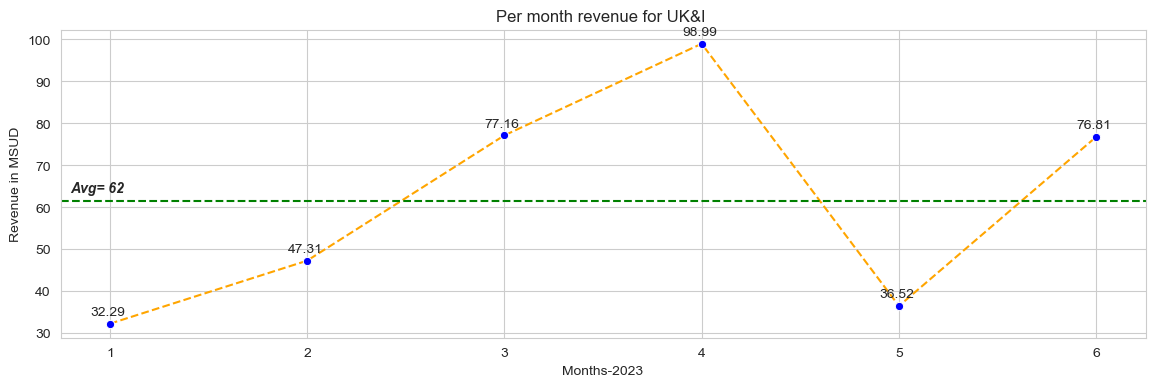

In [750]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=monthwise_revenue_uk.index,y=monthwise_revenue_uk,marker='o', markerfacecolor='blue',markersize=6,color='orange',linestyle='dashed',linewidth=1.5)
plt.axhline(monthwise_revenue_uk.mean(),color='green',linestyle='dashed',label='Avg line')
plt.xlabel("Months-2023")
plt.ylabel("Revenue in MSUD")
plt.title("Per month revenue for UK&I ")
for i,j in enumerate(monthwise_revenue_uk):
    plt.text(i+0.9,j+2,j)
plt.text(0.8,monthwise_revenue_uk.mean()+2,"Avg= "+str(round(monthwise_revenue_uk.mean())),fontdict={'weight':'bold','style':'italic'})

#### The business in UK&I region grows steadily from Jan to April but plunges down in may and grow more than double of may in June

#### We will perform cohort analysis

In [751]:
cohort_data_UK=UK_I_win_data[['Account Name','Close Date_dt','Sales Price']]

In [752]:
# getting the month in whcih customer made the first purchase
cohort_data_UK['Cust_aquire_mnth']=cohort_data_UK.groupby(['Account Name'])['Close Date_dt'].transform('min')
cohort_data_UK.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth
2,CBRE MANAGED SERVICES LTD,2023-02-06,0.00,2023-01-04
3,CBRE MANAGED SERVICES LTD,2023-02-06,3855.13,2023-01-04
18,PX Limited,2023-03-13,661.00,2023-03-13
24,Barclays Bank Plc,2023-05-17,1503.96,2023-01-03
45,Latitude 52 Management Co Ltd,2023-04-03,20.00,2023-03-30


In [753]:
# getting the month and year for acquired month and then for each month in which order was closed
close_month,close_year=get_yr_mnt(cohort_data_UK,'Close Date_dt')
cust_month,cust_year=get_yr_mnt(cohort_data_UK,'Cust_aquire_mnth')

In [754]:
# Now we will see for how long that customer is active
cohort_data_UK['active_months']=(close_month-cust_month)+12*(close_year-cust_year)
cohort_data_UK.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth,active_months
2,CBRE MANAGED SERVICES LTD,2023-02-06,0.00,2023-01-04,1
3,CBRE MANAGED SERVICES LTD,2023-02-06,3855.13,2023-01-04,1
18,PX Limited,2023-03-13,661.00,2023-03-13,0
24,Barclays Bank Plc,2023-05-17,1503.96,2023-01-03,4
45,Latitude 52 Management Co Ltd,2023-04-03,20.00,2023-03-30,1


In [755]:
cohort_data_UK['Cust_aquire_mnth_dt']=cohort_data_UK['Cust_aquire_mnth'].apply(get_date)

In [756]:
#now we will create a table to how many customers for how long active
cust_table_UK=cohort_data_UK.groupby(['Cust_aquire_mnth_dt','active_months'])['Account Name'].nunique()
# We will reset the index
cust_table_UK=cust_table_UK.reset_index()
cust_table_UK.head()

,Cust_aquire_mnth_dt,active_months,Account Name
0,2023-01-01,0,3109
1,2023-01-01,1,373
2,2023-01-01,2,347
3,2023-01-01,3,273
4,2023-01-01,4,280


In [757]:
# creating a pivot chart
cust_pvt_UK=pd.pivot_table(cust_table_UK,index='Cust_aquire_mnth_dt',columns='active_months',values='Account Name')
cust_pvt_UK.head()

active_months,0,1,2,3,4,5
Cust_aquire_mnth_dt,,,,,,
2023-01-01,3109.0,373.0,347.0,273.0,280.0,276.0
2023-02-01,2550.0,227.0,140.0,139.0,143.0,NaN
2023-03-01,2783.0,193.0,155.0,160.0,NaN,NaN
2023-04-01,1968.0,121.0,98.0,NaN,NaN,NaN
2023-05-01,2071.0,118.0,NaN,NaN,NaN,NaN


In [758]:
# We will see this data percentagewise
cohort_percent_UK=cust_pvt_UK.divide(cust_pvt_UK.iloc[:,0],axis=0)
cohort_percent_UK.index=cohort_percent_UK.index.strftime('%B %Y')

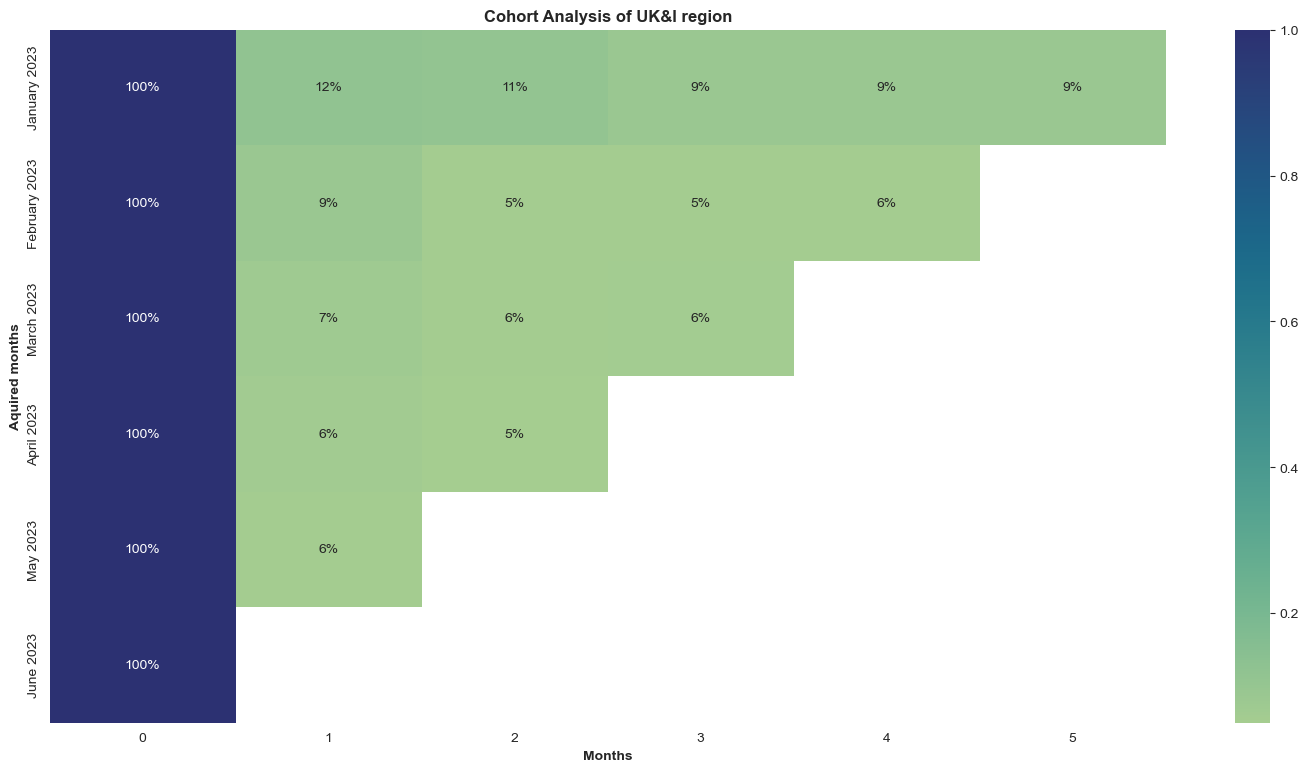

In [759]:
# we will visulalize this through a heatmap
plt.figure(figsize=(18,9))
sbn.heatmap(cohort_percent_UK,annot=True, fmt='.0%',cmap=sbn.color_palette('crest',as_cmap=True),)
plt.xlabel('Months',fontdict={'weight':'bold'})
plt.ylabel('Aquired months',fontdict={'weight':'bold'})
plt.title("Cohort Analysis of UK&I region",fontdict={'weight':'bold'})
plt.savefig('UK&I_cohort_table.png')

#### The customer retention of the UK&I region is very poor. Maximum percent of the customers they could retain is 12%

#### ----------Customer segmentation using Recency, Frequency, Monetory analysis-------

In [760]:
# We will find out the maximum date from which we wil calculate the recency period.
cohort_data_UK['Close Date_dt'].max()
max_date=pd.to_datetime('2023-07-01')

In [761]:
# We will calculate recency and then recency,monetary and frequency tables
cohort_data_UK['recency']=(max_date-cohort_data_UK['Close Date_dt']).dt.days
recency_table=cohort_data_UK.groupby(['Account Name'])['recency'].min()
frequency_table=cohort_data_UK.groupby(['Account Name'])['Close Date_dt'].nunique()
monetary_table=cohort_data_UK.groupby(['Account Name'])['Sales Price'].sum()

In [762]:
RMF_df_UK=pd.DataFrame({'Account':recency_table.index,'Recency_col':recency_table.values,
                     'Monetary_col':monetary_table.values,'Frequency_col':frequency_table.values})
RMF_df_UK.head()

,Account,Recency_col,Monetary_col,Frequency_col
0,(446) Johnson Controls Dubai Marine Service,60,216000.0,1
1,"(DHSC)Daehan Shipbuilding Co., Ltd",108,37000.0,2
2,(DSME)Daewoo Shipbuilding & Marine Engineering...,3,192000.0,3
3,"(DSSE)Daesun Shipbuilding Engineering Co., Ltd",148,8480.0,1
4,"(HHI)Hyundai Heavy Industries Co., Ltd_현대중공업",64,3794840.0,5


#### We will use Kmeans clustering

In [763]:
# before feeding to clustering, we will first select those records whcih are greter than 0
RMF_df_UK_cl=RMF_df_UK.query('Recency_col>0 and Monetary_col>0 and Frequency_col>0')

In [764]:
# Fisrt we will find out optimium number of clusters using elbow method.
clsut_data_Uk=RMF_df_UK_cl.iloc[:,1:]

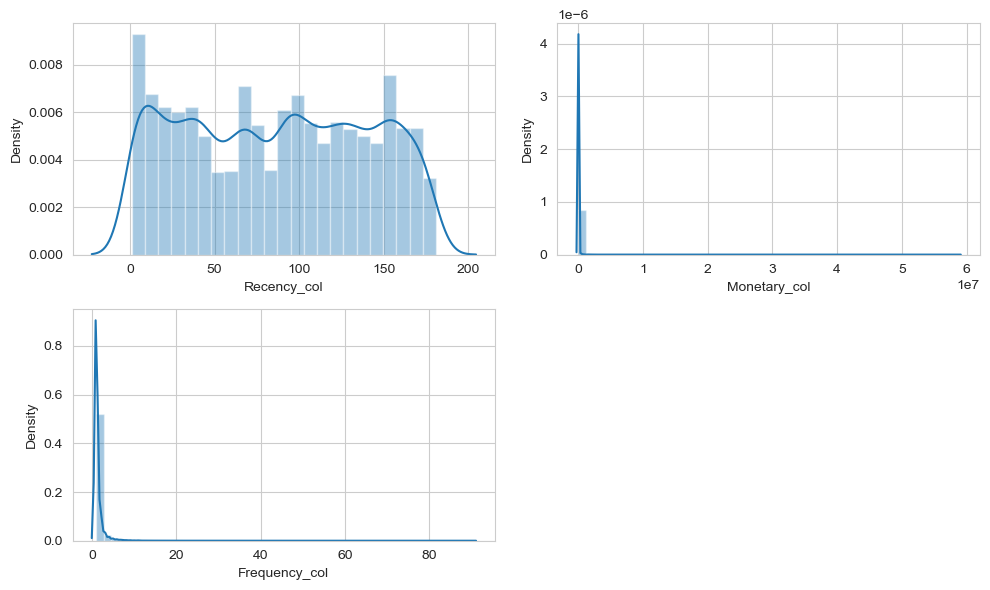

In [765]:
# Lets check if our data is skewed
plt.figure(figsize=(10,6))

for i,j in enumerate(clsut_data_Uk):
    plt.subplot(2,2,i+1)
    sbn.distplot(clsut_data_Uk[j],kde=True)
    plt.tight_layout()


In [766]:
# From above graphs we can see that data is not normalized and frequency and monetary column is highly right skewed
# We will normalize the data

clsut_data_norm_UK=clsut_data_Uk.apply(np.log,axis=1).round(2)

In [767]:
# We will scale the data befire feeding it to the clustering algorithm
std_scl_uk=StandardScaler()
cust_data_scaled_uk=std_scl_uk.fit_transform(clsut_data_norm_UK)

In [768]:
clust_dict_uk={}
silhoutte_dict_uk={}
silhoutte_sample_dict_uk={}
for i in range(2,15):
    k_means_clust=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    k_means_clust.fit(cust_data_scaled_uk)
    predictions_uk=k_means_clust.predict(cust_data_scaled_uk)
    silhoutte_dict_uk[i]=silhouette_score(cust_data_scaled_uk,predictions_uk)
    silhoutte_sample_dict_uk[i]=silhouette_samples(cust_data_scaled_uk,predictions_uk)
    clust_dict_uk[i]=k_means_clust.inertia_

Text(0, 0.5, 'WCSS')

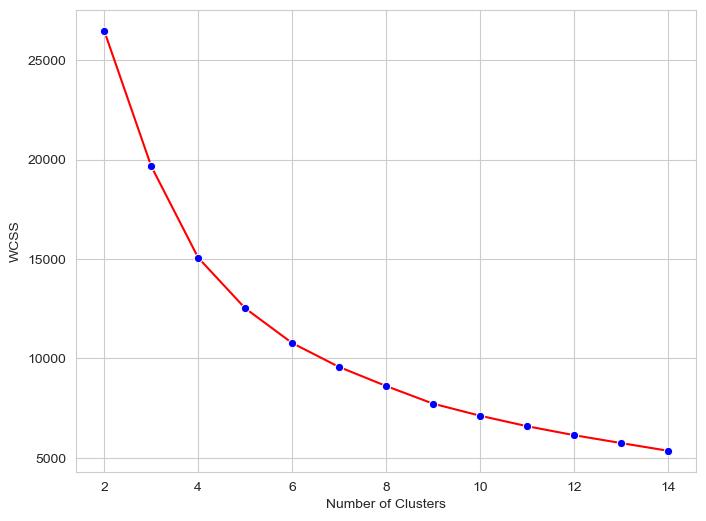

In [769]:
# We will plot the graph  to get optimum number of clsuters since all the clusters have begative values and elbow method show smoothening of curve after 4
plt.figure(figsize=(8,6))
sbn.lineplot(x=clust_dict_uk.keys(),y=clust_dict_uk.values(),marker='o',markerfacecolor='blue',color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [770]:
silhoutte_dict_uk

{2: 0.5442844513958466,
 3: 0.46859672173997974,
 4: 0.448871110782642,
 5: 0.4295142382070024,
 6: 0.40641678436801904,
 7: 0.37424883608760395,
 8: 0.37282426250579803,
 9: 0.37455049235680665,
 10: 0.35536096381917454,
 11: 0.3532486244438839,
 12: 0.35274342758858024,
 13: 0.3579946566239277,
 14: 0.3636161403907178}

In [771]:
# We will select 4 no of clusters to train our model 
k_means_clust=KMeans(n_clusters=4,max_iter=1000,random_state=42)
k_means_clust.fit(cust_data_scaled_uk)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [772]:
# We will Assign predictions
RMF_df_UK_cl['Clsuters']=k_means_clust.predict(cust_data_scaled_uk)
RMF_df_UK_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters
0,(446) Johnson Controls Dubai Marine Service,60,216000.0,1,3
1,"(DHSC)Daehan Shipbuilding Co., Ltd",108,37000.0,2,3
2,(DSME)Daewoo Shipbuilding & Marine Engineering...,3,192000.0,3,2
3,"(DSSE)Daesun Shipbuilding Engineering Co., Ltd",148,8480.0,1,3
4,"(HHI)Hyundai Heavy Industries Co., Ltd_현대중공업",64,3794840.0,5,2


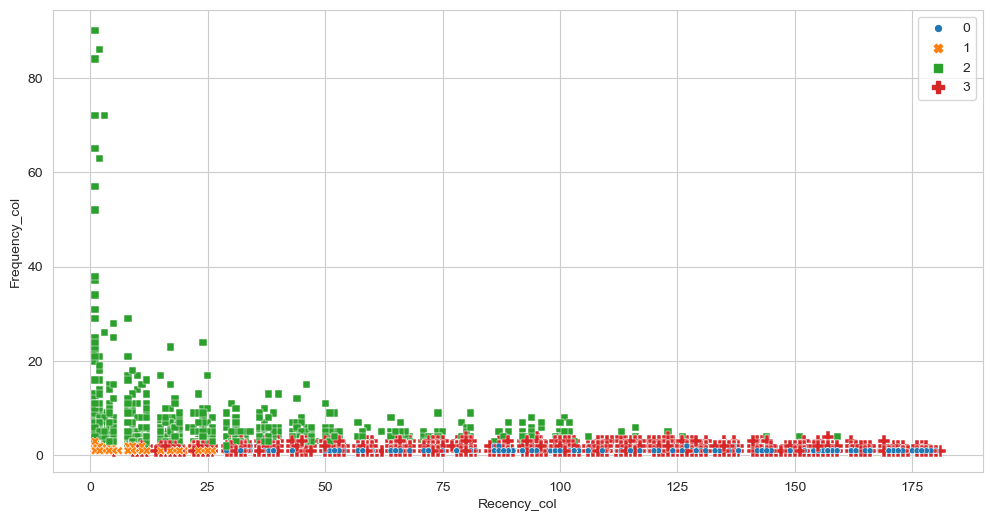

In [773]:
# We will plot the scatterplot for recency and frequency to visulaize these clusters,
#later we will plot the 3D plot as well for better visualization
plt.figure(figsize=(12,6))
sbn.scatterplot(x=RMF_df_UK_cl['Recency_col'],y=RMF_df_UK_cl['Frequency_col'],
                palette=sbn.color_palette("tab10"),hue=RMF_df_UK_cl['Clsuters'],style=RMF_df_UK_cl['Clsuters']
               ,size=RMF_df_UK_cl['Clsuters'])
plt.legend()

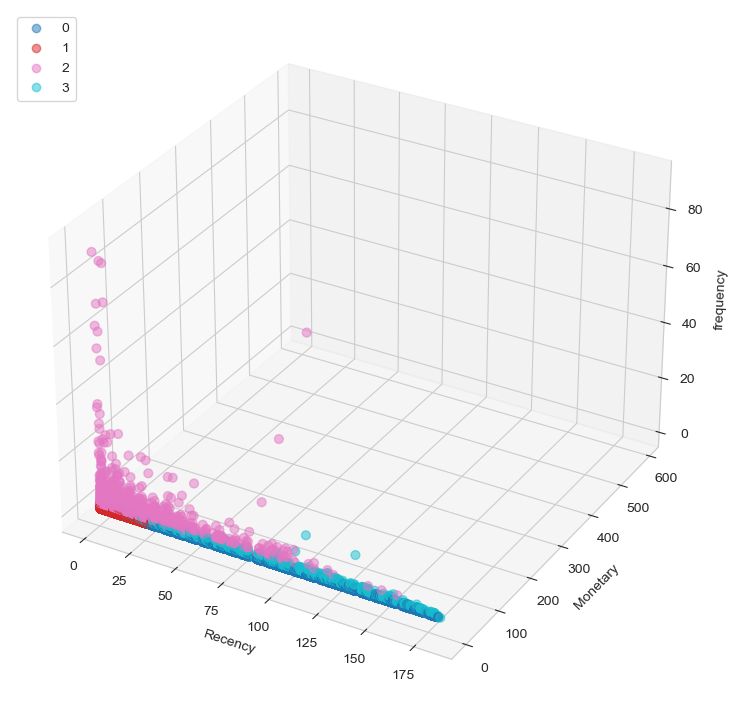

In [774]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection ='3d')
cmap = ListedColormap(sbn.color_palette("tab10").as_hex())
sc=ax.scatter(RMF_df_UK_cl['Recency_col'],round(RMF_df_UK_cl['Monetary_col']/100000,2),RMF_df_UK_cl['Frequency_col'],
           depthshade=True,s=40,c=RMF_df_UK_cl['Clsuters'],cmap=cmap,marker='o',alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('frequency')
plt.legend(*sc.legend_elements(), loc=2)

#### The customers represented by pink dots have shown recency, they have descent frequency and they have given some largest amount of business. We will mark them as promoters(cluster 2)
#### The customers represented by sky blue dots have given descent value orders and recency and frequency is descent. We will categorize them as supporters(cluster 3)
#### The customers represented by red dots have descent recency score lets categorize them as good customers(cluster 1)
#### The customers represented by dark blue dots have streched recency and their frequency also not that great, they are neutral(cluster 0)

In [775]:
def Assign_cust_seg_UK(x):
    if x==3:
        return 'Supporters'
    elif x==2:
        return 'Promoters'
    elif x==1:
        return 'Good'
    else:
        return 'Neutral'

In [776]:
RMF_df_UK_cl['Cust_segment']=RMF_df_UK_cl['Clsuters'].apply(Assign_cust_seg_UK)
RMF_df_UK_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters,Cust_segment
0,(446) Johnson Controls Dubai Marine Service,60,216000.0,1,3,Supporters
1,"(DHSC)Daehan Shipbuilding Co., Ltd",108,37000.0,2,3,Supporters
2,(DSME)Daewoo Shipbuilding & Marine Engineering...,3,192000.0,3,2,Promoters
3,"(DSSE)Daesun Shipbuilding Engineering Co., Ltd",148,8480.0,1,3,Supporters
4,"(HHI)Hyundai Heavy Industries Co., Ltd_현대중공업",64,3794840.0,5,2,Promoters


##### ------------------------------------------------------------------------------------------------

### 4.MEA

In [777]:
# We will select the data for northen europe region
MEA_region=sales_data[sales_data['Business Region']=='MEA']

In [778]:
# Lets examine which countries fall in MEA region
MEA_region['BV_Country'].unique()

array(['Turkey', 'United Arab Emirates', 'Qatar', 'South Africa',
       'Kuwait', 'Egypt', 'Saudi Arabia', 'Oman', 'Bahrain'], dtype=object)

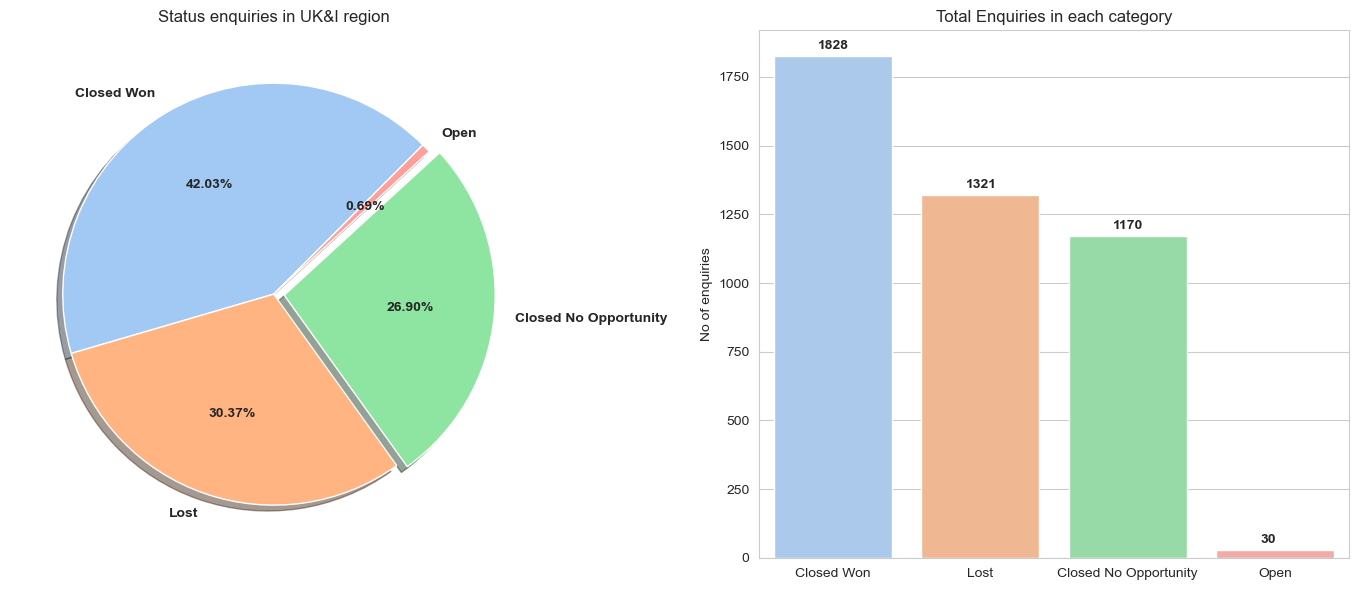

In [779]:
# Lets see how  distribution of enquiries has been

size=MEA_region['STATUS'].value_counts()
label=MEA_region['STATUS'].value_counts().index
explode=[0,0,0.05,0]

sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("pastel"),
        autopct='%1.2f%%',shadow=True,startangle=45,radius=1,textprops={'weight':'bold'})
plt.title("Status enquiries in UK&I region")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("pastel"))
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("No of enquiries")
for i,j in enumerate(MEA_region['STATUS'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### We can see that 42% is the hit rate for MEA region with almost 27% of loss ratio,

#### We will see what is the Business Distribution for the orders which have been won for MEA region

In [780]:
MEA_win_data=MEA_region[MEA_region['STATUS']=='Closed Won']

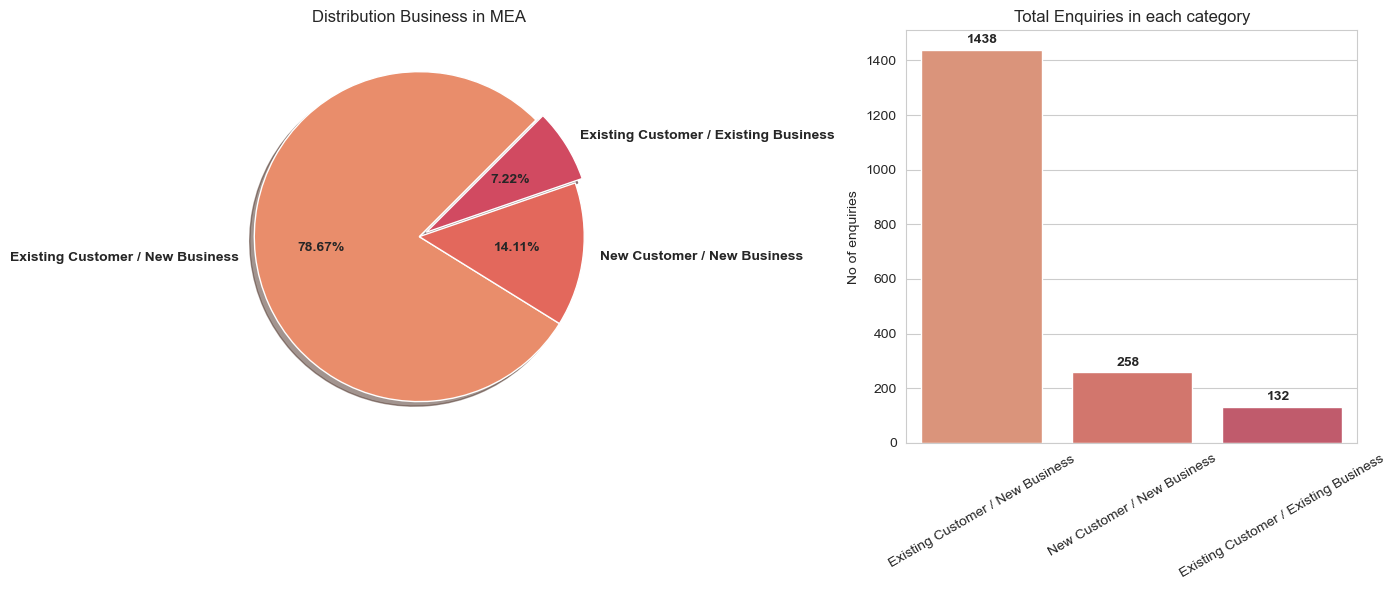

In [781]:

size=MEA_win_data['New / Existing Business'].value_counts()
label=MEA_win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("flare"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business in MEA")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("flare"))
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(MEA_win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### In MEA, the enquiries for VOs are even lesser than the enquiries from the new customers. The enquiries from Existing customer are 78.67%

#### Lets examine distribution of business revenuewise for MEA

In [782]:
revenue_MEA=MEA_win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue_MEA=round(revenue_MEA/1000000,2) # converting to million USD

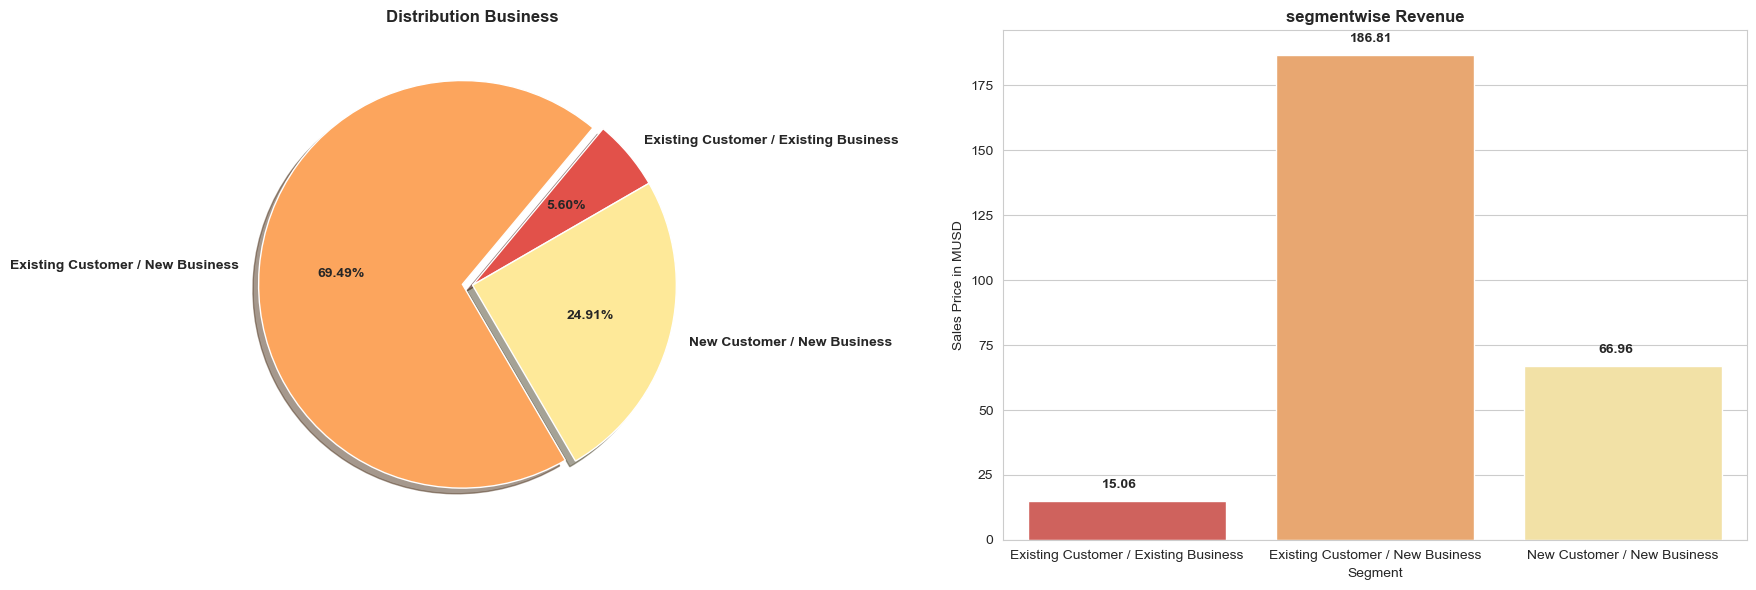

In [783]:
size=revenue_MEA
label=revenue_MEA.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=30,textprops={'weight':'bold'})
plt.title("Distribution Business",fontdict={'weight':'bold'})

plt.subplot(1,2,2)
sbn.barplot(x=revenue_MEA.index,y=revenue_MEA,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue_MEA):
    plt.text(i-0.1,j+5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue",fontdict={'weight':'bold'})
plt.tight_layout()

#### The revenue generated from new business is lmost 25% though the enquiries are about 15%. Majority of the revenue for MEA region has come from new business given by existing customers

In [784]:
MEA_country=MEA_win_data.groupby(by='BV_Country')['Sales Price'].agg('sum')
MEA_country=MEA_country/1000000
MEA_country=round((MEA_country/MEA_country.sum())*100,2)
MEA_country=MEA_country.sort_values(ascending=False)

Text(0.5, 1.0, 'Countrywise percent Revenue')

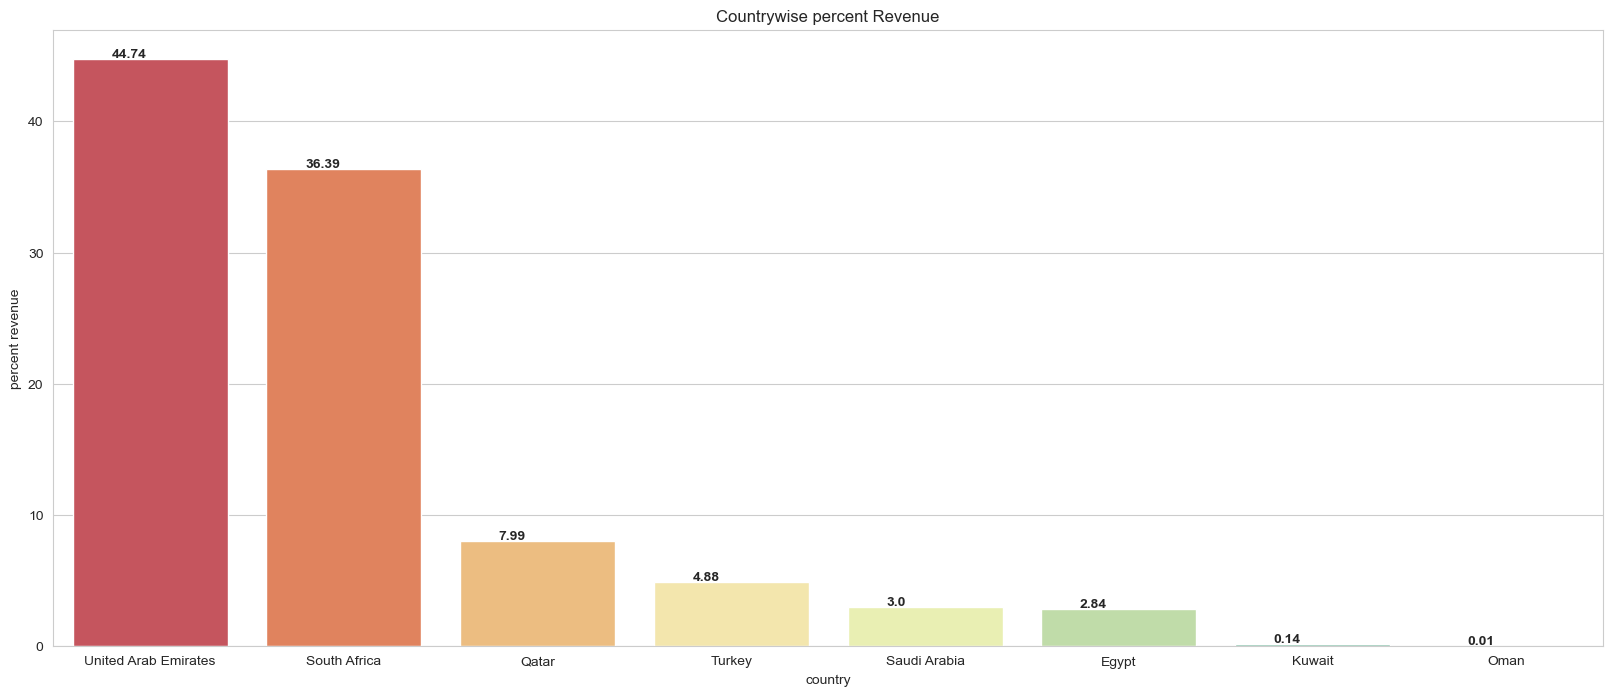

In [785]:
plt.figure(figsize=(20,8))
sbn.barplot(x=MEA_country.index,y=MEA_country,palette="Spectral")
for i,j in enumerate(MEA_country):
    plt.text(i-0.2,j+0.1,j,fontdict={'weight':'bold'})
plt.xlabel("country")
plt.ylabel("percent revenue")
plt.title("Countrywise percent Revenue")

#### About 81% of total revenue is contributed by UAE and South Africa only

#### We will see some important statistics

In [786]:
mean_days_MEA=np.mean((MEA_win_data['Close Date_dt']-MEA_win_data['Created_Date_dt'])).days
min_days_MEA=min((MEA_win_data['Close Date_dt']-MEA_win_data['Created_Date_dt'])).days
max_days_MEA=max((MEA_win_data['Close Date_dt']-MEA_win_data['Created_Date_dt'])).days
max_revenue_MEA=max(MEA_win_data['Sales Price'])
min_revenue_MEA=min(MEA_win_data['Sales Price'])

In [787]:
monthwise_revenue_MEA=MEA_win_data.groupby(by='month_closed_dt')['Sales Price'].agg('sum')
monthwise_revenue_MEA=round(monthwise_revenue_MEA/1000000,2)

In [788]:
MEA_df=pd.DataFrame({'Description':['Avg Days for closure','Min days for closure','Max days for closure','Highest grossing month/revenue','Lowest grossing month/revenue','Avg revenue','Max_order_val','Min_order_val'],
                    'Values':[mean_days_MEA,min_days_MEA,max_days_MEA,(monthwise_revenue_MEA[monthwise_revenue_MEA==monthwise_revenue_MEA.max()].index.values[0],monthwise_revenue_MEA.max())
                    ,(monthwise_revenue_MEA[monthwise_revenue_MEA==monthwise_revenue_MEA.min()].index.values[0],monthwise_revenue_MEA.min()),monthwise_revenue_MEA.mean(),max_revenue_MEA,min_revenue_MEA]})
MEA_df.index=MEA_df.Description
MEA_df.drop('Description', axis=1,inplace=True)

In [789]:
MEA_df

,Values
Description,
Avg Days for closure,112
Min days for closure,-14
Max days for closure,1997
Highest grossing month/revenue,"(3, 62.33)"
Lowest grossing month/revenue,"(4, 25.58)"
Avg revenue,44.806667
Max_order_val,20614105.69
Min_order_val,0.0


Text(0.8, 46.806666666666665, 'Avg= 45')

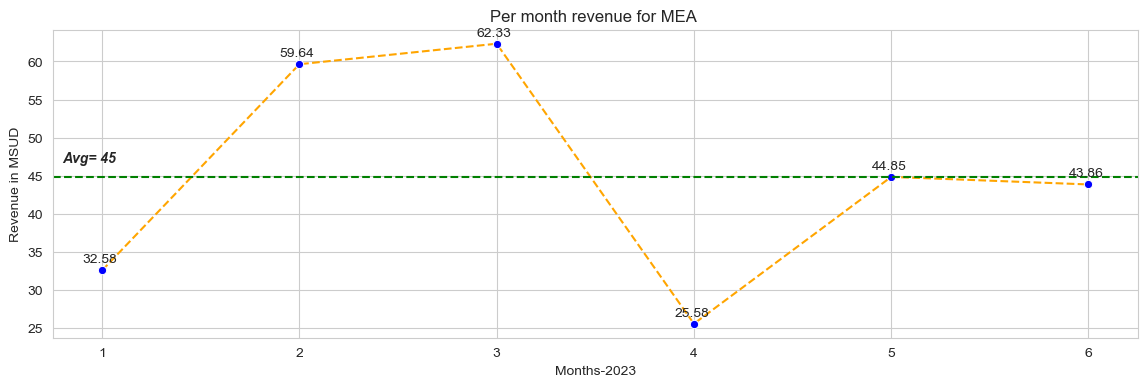

In [790]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=monthwise_revenue_MEA.index,y=monthwise_revenue_MEA,marker='o', markerfacecolor='blue',markersize=6,color='orange',linestyle='dashed',linewidth=1.5)
plt.axhline(monthwise_revenue_MEA.mean(),color='green',linestyle='dashed',label='Avg line')
plt.xlabel("Months-2023")
plt.ylabel("Revenue in MSUD")
plt.title("Per month revenue for MEA ")
for i,j in enumerate(monthwise_revenue_MEA):
    plt.text(i+0.9,j+1,j)
plt.text(0.8,monthwise_revenue_MEA.mean()+2,"Avg= "+str(round(monthwise_revenue_MEA.mean())),fontdict={'weight':'bold','style':'italic'})

#### The revenue in MEA increases rapidly from JAN to feb and steadily from feb to march. March is the highest grossing month. But plunges to 25.58 MUSD just next month.So while MArch gives the highest revenue, the next month gives the lowes

#### We will perform cohort Analysis

In [791]:
cohort_data_MEA=MEA_win_data[['Account Name','Close Date_dt','Sales Price']]

In [792]:
# getting the month in whcih customer made the first purchase
cohort_data_MEA['Cust_aquire_mnth']=cohort_data_MEA.groupby(['Account Name'])['Close Date_dt'].transform('min')
cohort_data_MEA.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth
1,Anda Otomasyon Yangın Söndürme Sistemleri Sana...,2023-02-27,2261.00,2023-02-27
30,Emdad,2023-06-08,483.82,2023-01-10
106,CANTEK ENERJI SAN.VE TIC.AS.,2023-01-13,25570.00,2023-01-13
133,Anson Construction,2023-01-31,121525.00,2023-01-31
212,MULTILINES ELECTROMEHANICAL-DB,2023-04-14,32000.00,2023-04-14


In [793]:
# getting the month and year for acquired month and then for each month in which order was closed
close_month,close_year=get_yr_mnt(cohort_data_MEA,'Close Date_dt')
cust_month,cust_year=get_yr_mnt(cohort_data_MEA,'Cust_aquire_mnth')

In [794]:
# Now we will see for how long that customer is active
cohort_data_MEA['active_months']=(close_month-cust_month)+12*(close_year-cust_year)
cohort_data_MEA.head()

,Account Name,Close Date_dt,Sales Price,Cust_aquire_mnth,active_months
1,Anda Otomasyon Yangın Söndürme Sistemleri Sana...,2023-02-27,2261.00,2023-02-27,0
30,Emdad,2023-06-08,483.82,2023-01-10,5
106,CANTEK ENERJI SAN.VE TIC.AS.,2023-01-13,25570.00,2023-01-13,0
133,Anson Construction,2023-01-31,121525.00,2023-01-31,0
212,MULTILINES ELECTROMEHANICAL-DB,2023-04-14,32000.00,2023-04-14,0


In [795]:
# We will change the day to 1as it will be easier to group them later.
cohort_data_MEA['Cust_aquire_mnth_dt']=cohort_data_MEA['Cust_aquire_mnth'].apply(get_date)

In [796]:
#now we will create a table to how many customers for how long active
cust_table_MEA=cohort_data_MEA.groupby(['Cust_aquire_mnth_dt','active_months'])['Account Name'].nunique()
# We will reset the index
cust_table_MEA=cust_table_MEA.reset_index()
cust_table_MEA.head()

,Cust_aquire_mnth_dt,active_months,Account Name
0,2023-01-01,0,191
1,2023-01-01,1,34
2,2023-01-01,2,32
3,2023-01-01,3,27
4,2023-01-01,4,44


In [797]:
# creating a pivot chart
cust_pvt_MEA=pd.pivot_table(cust_table_MEA,index='Cust_aquire_mnth_dt',columns='active_months',values='Account Name')
cust_pvt_MEA.head()

active_months,0,1,2,3,4,5
Cust_aquire_mnth_dt,,,,,,
2023-01-01,191.0,34.0,32.0,27.0,44.0,29.0
2023-02-01,150.0,22.0,22.0,24.0,20.0,NaN
2023-03-01,169.0,21.0,21.0,19.0,NaN,NaN
2023-04-01,132.0,16.0,16.0,NaN,NaN,NaN
2023-05-01,137.0,10.0,NaN,NaN,NaN,NaN


In [798]:
# We will see this data percentagewise
cohort_percent_MEA=cust_pvt_MEA.divide(cust_pvt_MEA.iloc[:,0],axis=0)
cohort_percent_MEA.index=cust_pvt_MEA.index.strftime('%B %Y')

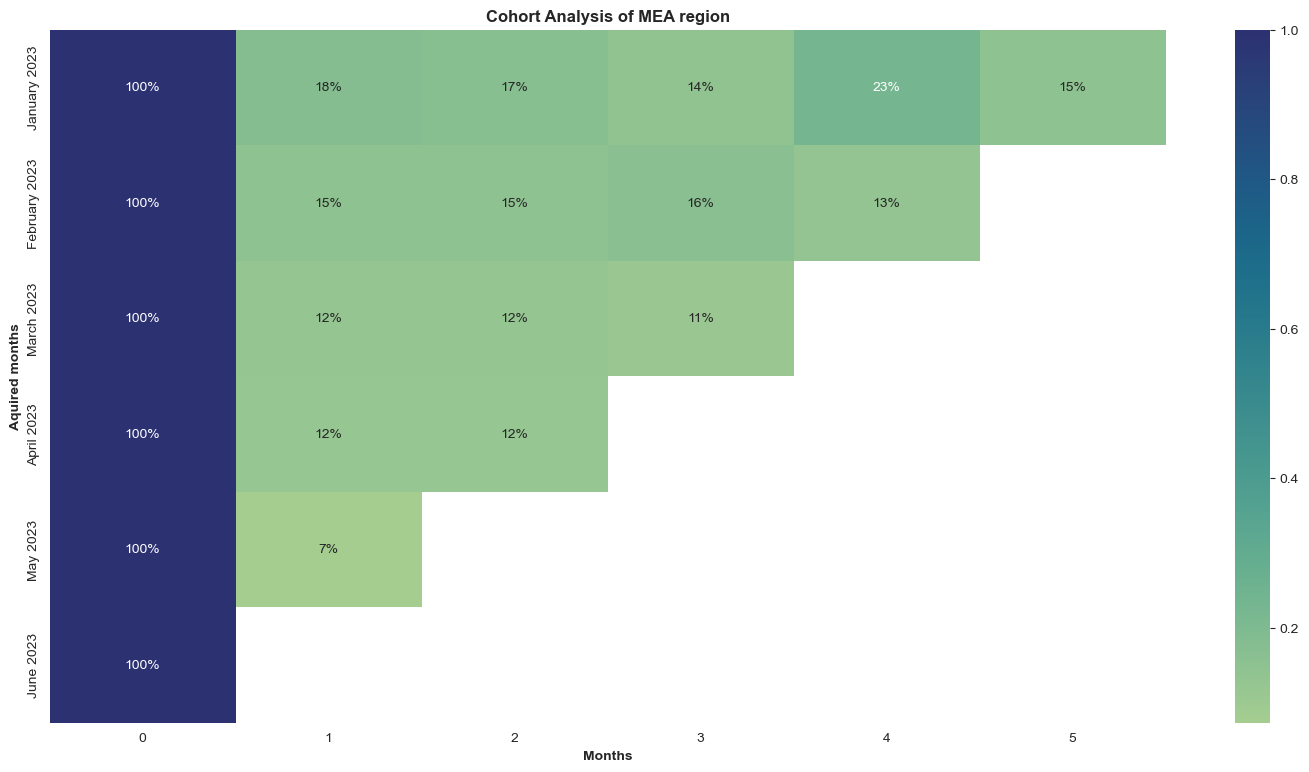

In [799]:
# we will visulalize this through a heatmap
plt.figure(figsize=(18,9))
sbn.heatmap(cohort_percent_MEA,annot=True, fmt='.0%',cmap=sbn.color_palette('crest',as_cmap=True),)
plt.xlabel('Months',fontdict={'weight':'bold'})
plt.ylabel('Aquired months',fontdict={'weight':'bold'})
plt.title("Cohort Analysis of MEA region",fontdict={'weight':'bold'})
plt.savefig('MEA_cohort_table.png')

#### From above, we can see that,  Customers Aquired in then month of Jan have shown steady pattern of retention though the percent retention is not that great
#### May has the lowest percent of retention along with April and March which is consistent with the all the regions so far.

#### ----------Customer segmentation using Recency, Frequency, Monetory analysis-------

In [800]:
# We will find out the maximum date from which we wil calculate the recency period.
cohort_data_MEA['Close Date_dt'].max()
max_date=pd.to_datetime('2023-07-01')

In [801]:
# We will calculate recency and then recency,monetary and frequency tables
cohort_data_MEA['recency']=(max_date-cohort_data_MEA['Close Date_dt']).dt.days
recency_table=cohort_data_MEA.groupby(['Account Name'])['recency'].min()
frequency_table=cohort_data_MEA.groupby(['Account Name'])['Close Date_dt'].nunique()
monetary_table=cohort_data_MEA.groupby(['Account Name'])['Sales Price'].sum()

In [802]:
RMF_df_MEA=pd.DataFrame({'Account':recency_table.index,'Recency_col':recency_table.values,
                     'Monetary_col':monetary_table.values,'Frequency_col':frequency_table.values})
RMF_df_MEA.head()

,Account,Recency_col,Monetary_col,Frequency_col
0,"""Ventservis"" OsOO",88,155548.00,1
1,(448) Johnson Controls Egypt Ltd.,142,90494.00,1
2,1000 Walls Interiors & Decoration WLL,52,8199.56,2
3,3W Networks FZE,33,32000.00,1
4,5092 DX CPT,152,1095807.85,1


#### We will use KMeans Clustering approach

In [803]:
# before feeding to clustering, we will first select those records whcih are greter than 0
RMF_df_MEA_cl=RMF_df_MEA.query('Recency_col>0 and Monetary_col>0 and Frequency_col>0')

In [804]:
# Fisrt we will find out optimium number of clusters using elbow method.
clsut_data_MEA=RMF_df_MEA_cl.iloc[:,1:]

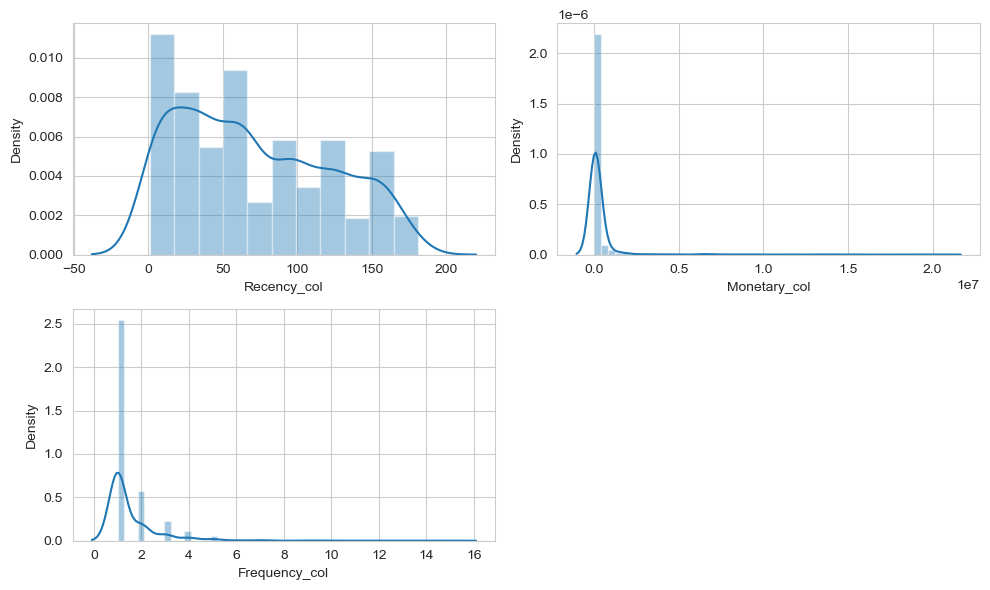

In [805]:
# Lets check if our data is skewed
plt.figure(figsize=(10,6))

for i,j in enumerate(clsut_data_MEA):
    plt.subplot(2,2,i+1)
    sbn.distplot(clsut_data_MEA[j],kde=True)
    plt.tight_layout()


In [806]:
# From above graphs we can see that data is not normalized and frequency and monetary column is highly right skewed
# We will normalize the data

clsut_data_norm_MEA=clsut_data_MEA.apply(np.log,axis=1).round(2)

In [807]:
# We will scale the data befire feeding it to the clustering algorithm
std_scl_MEA=StandardScaler()
cust_data_scaled_MEA=std_scl_MEA.fit_transform(clsut_data_norm_MEA)

In [808]:
# We will train Kmeans Algo with different nuber of clsuters and then withnElboq method will find optimum number of clusters
clust_dict_MEA={}
silhoutte_dict_MEA={}
silhoutte_sample_dict_MEA={}
for i in range(2,15):
    k_means_clust=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    k_means_clust.fit(cust_data_scaled_MEA)
    predictions_MEA=k_means_clust.predict(cust_data_scaled_MEA)
    silhoutte_dict_MEA[i]=silhouette_score(cust_data_scaled_MEA,predictions_MEA)
    silhoutte_sample_dict_MEA[i]=silhouette_samples(cust_data_scaled_MEA,predictions_MEA)
    clust_dict_MEA[i]=k_means_clust.inertia_

Text(0, 0.5, 'WCSS')

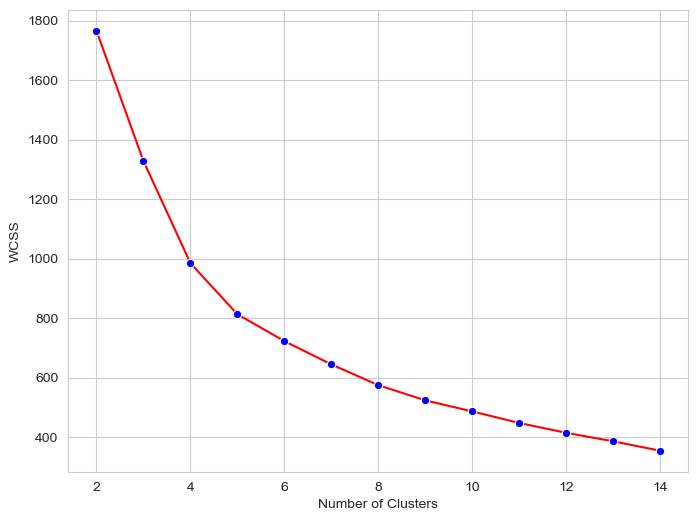

In [809]:
# We will plot the graph  to get optimum number of clsuters since all the clusters have begative values and elbow method show smoothening of curve after 4
plt.figure(figsize=(8,6))
sbn.lineplot(x=clust_dict_MEA.keys(),y=clust_dict_MEA.values(),marker='o',markerfacecolor='blue',color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [810]:
silhoutte_dict_MEA

{2: 0.3911482269894003,
 3: 0.32194077524463566,
 4: 0.36265357589676783,
 5: 0.38347052878603805,
 6: 0.36114870616876754,
 7: 0.32625930482398763,
 8: 0.33122012780639326,
 9: 0.3379921562836624,
 10: 0.3441806303385258,
 11: 0.3418826179495829,
 12: 0.3467153018853157,
 13: 0.339694639857687,
 14: 0.34565788008480036}

In [811]:
# We will select 4 no of clusters to train our model 
k_means_clust=KMeans(n_clusters=4,max_iter=1000,random_state=42)
k_means_clust.fit(cust_data_scaled_MEA)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [812]:
# We will Assign predictions
RMF_df_MEA_cl['Clsuters']=k_means_clust.predict(cust_data_scaled_MEA)
RMF_df_MEA_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters
0,"""Ventservis"" OsOO",88,155548.00,1,0
1,(448) Johnson Controls Egypt Ltd.,142,90494.00,1,0
2,1000 Walls Interiors & Decoration WLL,52,8199.56,2,3
3,3W Networks FZE,33,32000.00,1,0
4,5092 DX CPT,152,1095807.85,1,0


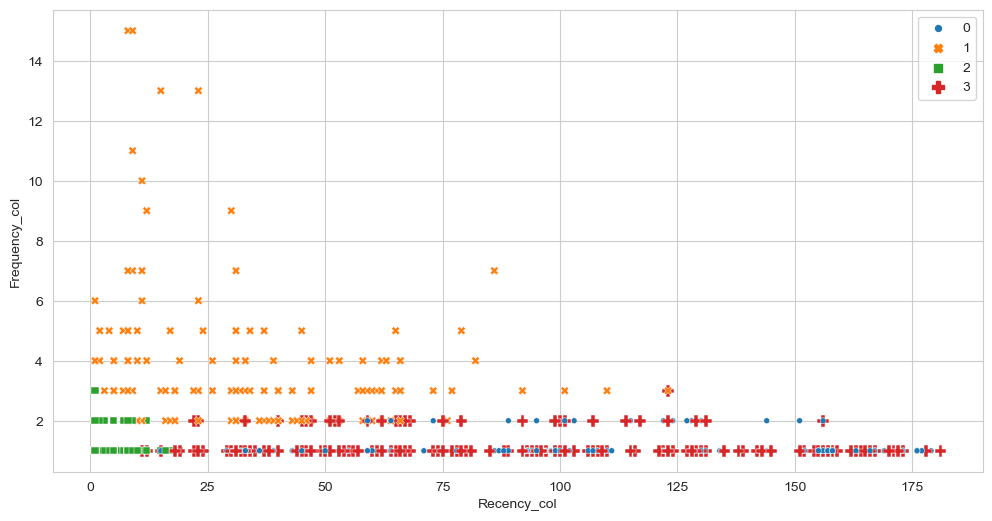

In [813]:
# We will plot the scatterplot for recency and frequency to visulaize these clusters,
#later we will plot the 3D plot as well for better visualization
plt.figure(figsize=(12,6))
sbn.scatterplot(x=RMF_df_MEA_cl['Recency_col'],y=RMF_df_MEA_cl['Frequency_col'],
                palette=sbn.color_palette("tab10"),hue=RMF_df_MEA_cl['Clsuters'],style=RMF_df_MEA_cl['Clsuters']
               ,size=RMF_df_MEA_cl['Clsuters'])
plt.legend()

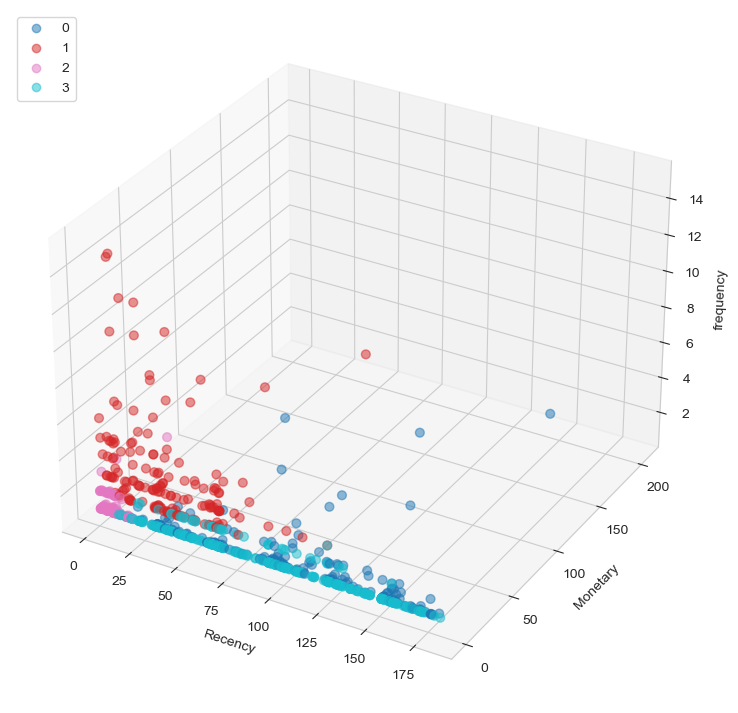

In [814]:
plt.figure(figsize=(16,9))
ax = plt.axes(projection ='3d')
cmap = ListedColormap(sbn.color_palette("tab10").as_hex())
sc=ax.scatter(RMF_df_MEA_cl['Recency_col'],round(RMF_df_MEA_cl['Monetary_col']/100000,2),RMF_df_MEA_cl['Frequency_col'],
           depthshade=True,s=40,c=RMF_df_MEA_cl['Clsuters'],cmap=cmap,marker='o',alpha=0.5)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('frequency')
plt.legend(*sc.legend_elements(), loc=2)

#### The customers represented by red dots have shown recency, they have descent frequency and they have given some largest amount of business. We will mark them as promoters(cluster 1)
#### The customers represented by dark blue dots have given good amountr of business with some large value orders and recency and frequency is descent. We will categorize them as supporters(cluster 0)
#### The customers represented by Pink dots have descent recency score lets categorize them as good customers(cluster 2)
#### The customers represented by sky blue dots have streched recency and their frequency also not that great, they are neutral(cluster 3)

In [815]:
def Assign_cust_seg_MEA(x):
    if x==0:
        return 'Supporters'
    elif x==1:
        return 'Promoters'
    elif x==3:
        return 'Neutral'
    else:
        return 'Good'

In [816]:
RMF_df_MEA_cl['Cust_segment']=RMF_df_MEA_cl['Clsuters'].apply(Assign_cust_seg_MEA)
RMF_df_MEA_cl.head()

,Account,Recency_col,Monetary_col,Frequency_col,Clsuters,Cust_segment
0,"""Ventservis"" OsOO",88,155548.00,1,0,Supporters
1,(448) Johnson Controls Egypt Ltd.,142,90494.00,1,0,Supporters
2,1000 Walls Interiors & Decoration WLL,52,8199.56,2,3,Neutral
3,3W Networks FZE,33,32000.00,1,0,Supporters
4,5092 DX CPT,152,1095807.85,1,0,Supporters


##### ------------------------------------------------------------------------------------------------

### 5.South Europe

In [817]:
# We will select the data for northen europe region
SE_region=sales_data[sales_data['Business Region']=='Europe South']

In [818]:
# Lets examine which countries fall in Southern Europe region
SE_region['BV_Country'].unique()

array(['France', 'Spain', 'Italy', 'Portugal'], dtype=object)

In [819]:
SE_region['STATUS'].value_counts()

STATUS
Closed Won               8487
Closed No Opportunity    2024
Lost                     1299
Name: count, dtype: int64

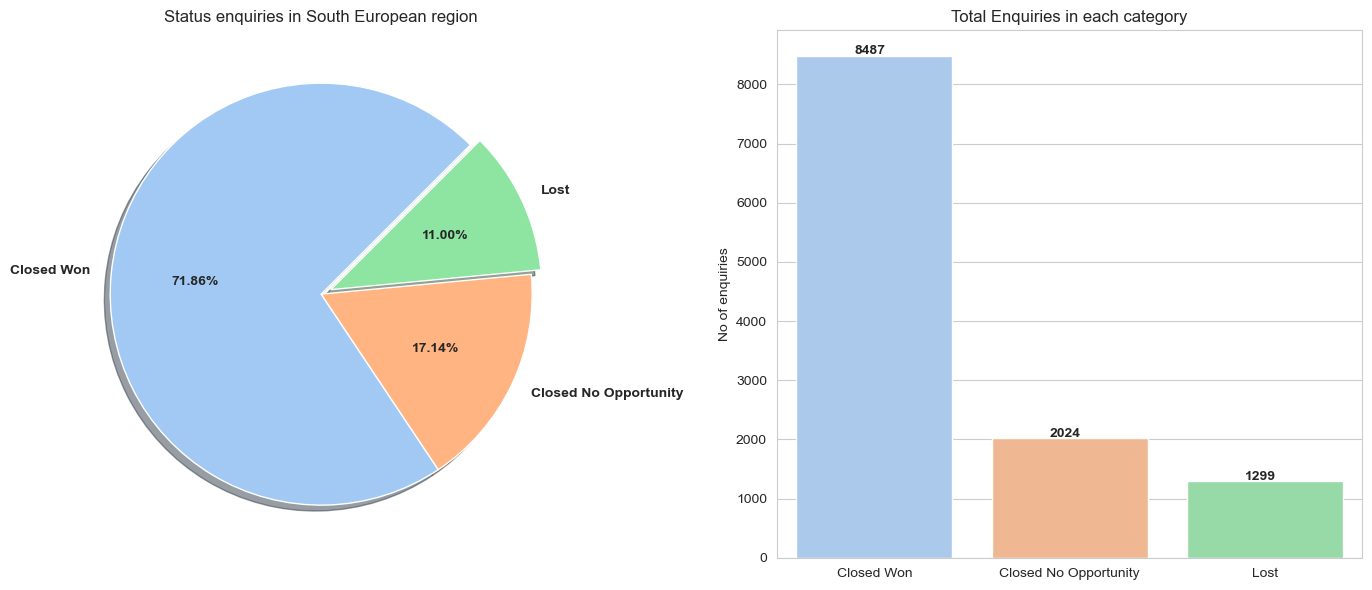

In [820]:
# Lets see how  distribution of enquiries has been

size=SE_region['STATUS'].value_counts()
label=SE_region['STATUS'].value_counts().index
explode=[0,0,0.05]

sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("pastel"),
        autopct='%1.2f%%',shadow=True,startangle=45,radius=1,textprops={'weight':'bold'})
plt.title("Status enquiries in South European region")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("pastel"))
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("No of enquiries")
for i,j in enumerate(SE_region['STATUS'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Souther Europe has almost 72% of hit ratio

#### We will see what is the Business Distribution for the orders which have been won for Southern Europe region

In [821]:
SE_win_data=SE_region[SE_region['STATUS']=='Closed Won']

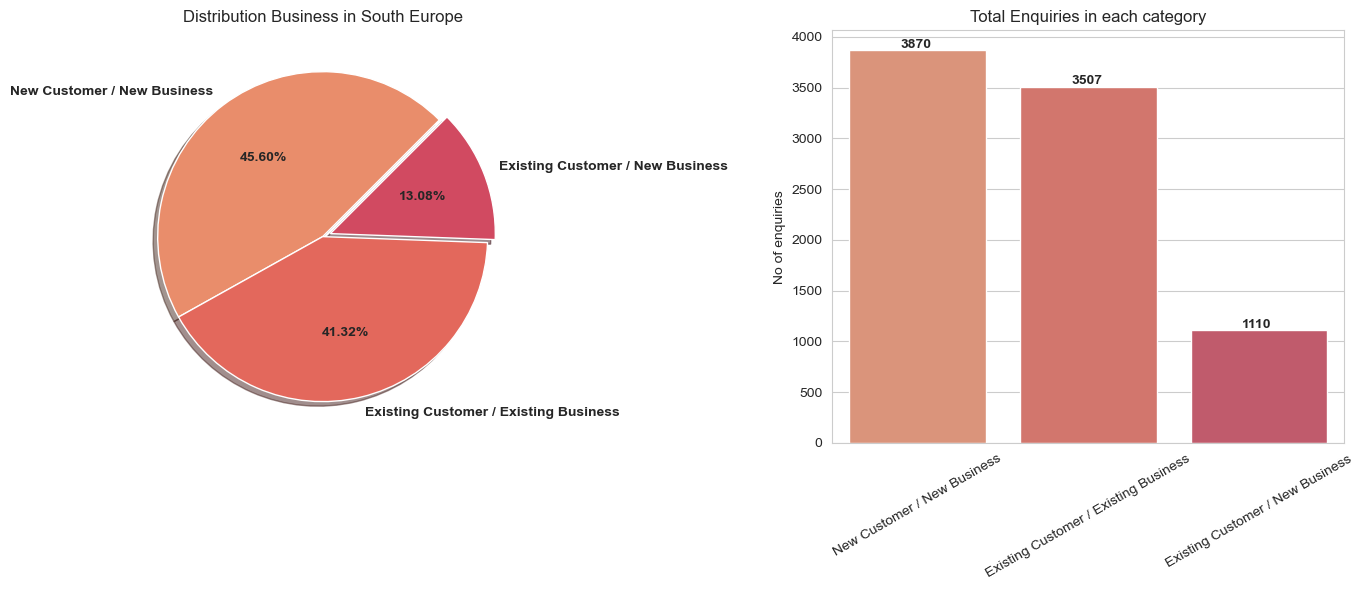

In [822]:

size=SE_win_data['New / Existing Business'].value_counts()
label=SE_win_data['New / Existing Business'].value_counts().index
explode=[0,0,0.05]
sbn.set_style("whitegrid")
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("flare"),
        autopct='%1.2f%%',shadow=True,startangle=45,textprops={'weight':'bold'})
plt.title("Distribution Business in South Europe")

plt.subplot(1,2,2)
sbn.barplot(x=label,y=size,palette=sbn.color_palette("flare"))
plt.xlabel("")
plt.xticks(rotation=30)
plt.ylabel("No of enquiries")
for i,j in enumerate(SE_win_data['New / Existing Business'].value_counts()):
    plt.text(i-0.1,j+25,j,fontdict={'weight':'bold'})
plt.title("Total Enquiries in each category")

plt.tight_layout()

#### Here unlike other regions, we have 45.60 enquiries from New customers which were converted in revenue.At the same time 41.32% percent converted enquiries were VOs

#### Lets examine distribution of business revenuewise for Southern Europe

In [823]:
revenue_SE=SE_win_data.groupby(by='New / Existing Business')['Sales Price'].agg('sum')
revenue_SE=round(revenue_SE/1000000,2) # converting to million USD

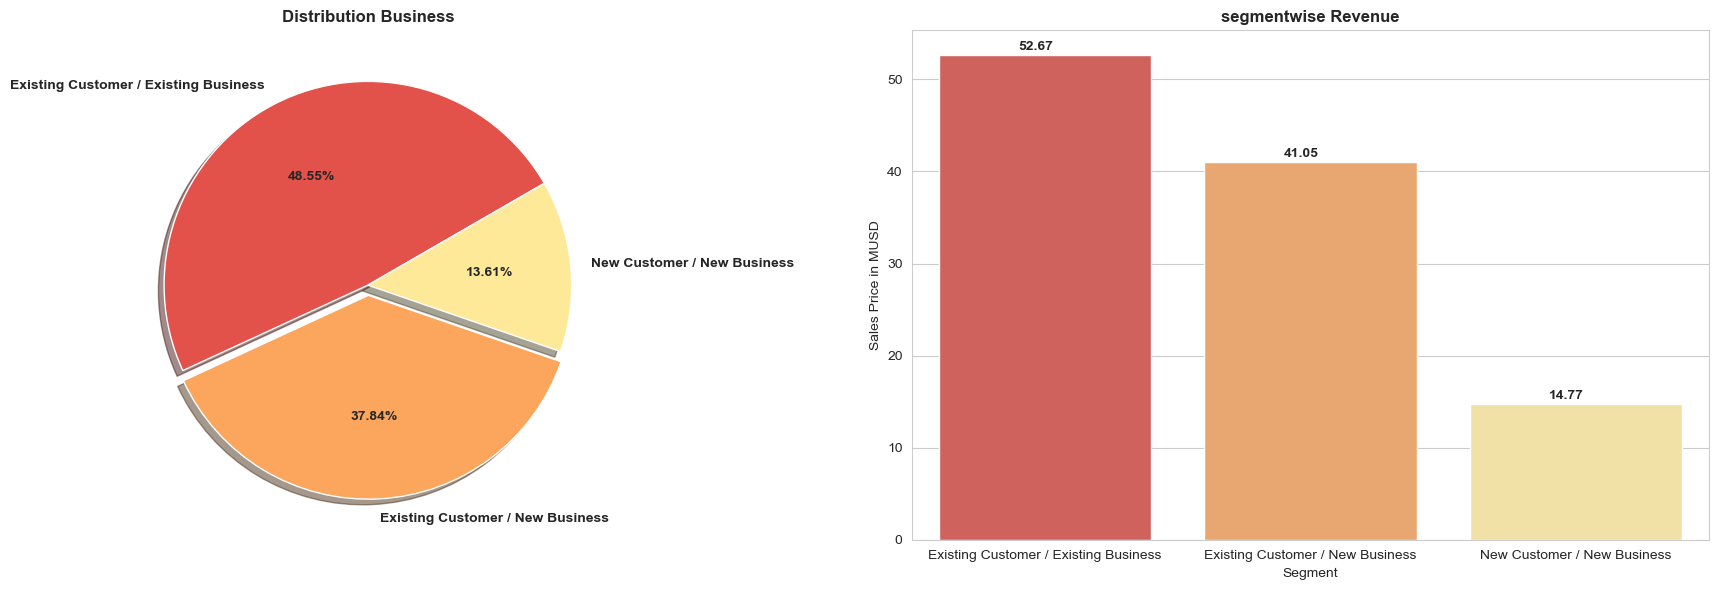

In [824]:
size=revenue_SE
label=revenue_SE.index
explode=[0,0.05,0]
sbn.set_style("whitegrid")
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(size,labels=label,explode=explode,colors=sbn.color_palette("Spectral"),
        autopct='%1.2f%%',shadow=True,startangle=30,textprops={'weight':'bold'})
plt.title("Distribution Business",fontdict={'weight':'bold'})

plt.subplot(1,2,2)
sbn.barplot(x=revenue_SE.index,y=revenue_SE,palette=sbn.color_palette("Spectral"))
for i,j in enumerate(revenue_SE):
    plt.text(i-0.1,j+0.5,j,fontdict={'weight':'bold'})
plt.xlabel("Segment")
plt.ylabel("Sales Price in MUSD")
plt.title("segmentwise Revenue",fontdict={'weight':'bold'})
plt.tight_layout()

#### We can see here , though the number of enquiries  from New customer were converted, but the revenue generated from them was about 14% only.
#### Most of the revenue came from VOs and then by new business given by Existing customer

In [825]:
SE_country=SE_win_data.groupby(by='BV_Country')['Sales Price'].agg('sum')
SE_country=SE_country/1000000
SE_country=round((SE_country/SE_country.sum())*100,2)
SE_country=SE_country.sort_values(ascending=False)

Text(0.5, 1.0, 'Countrywise percent Revenue')

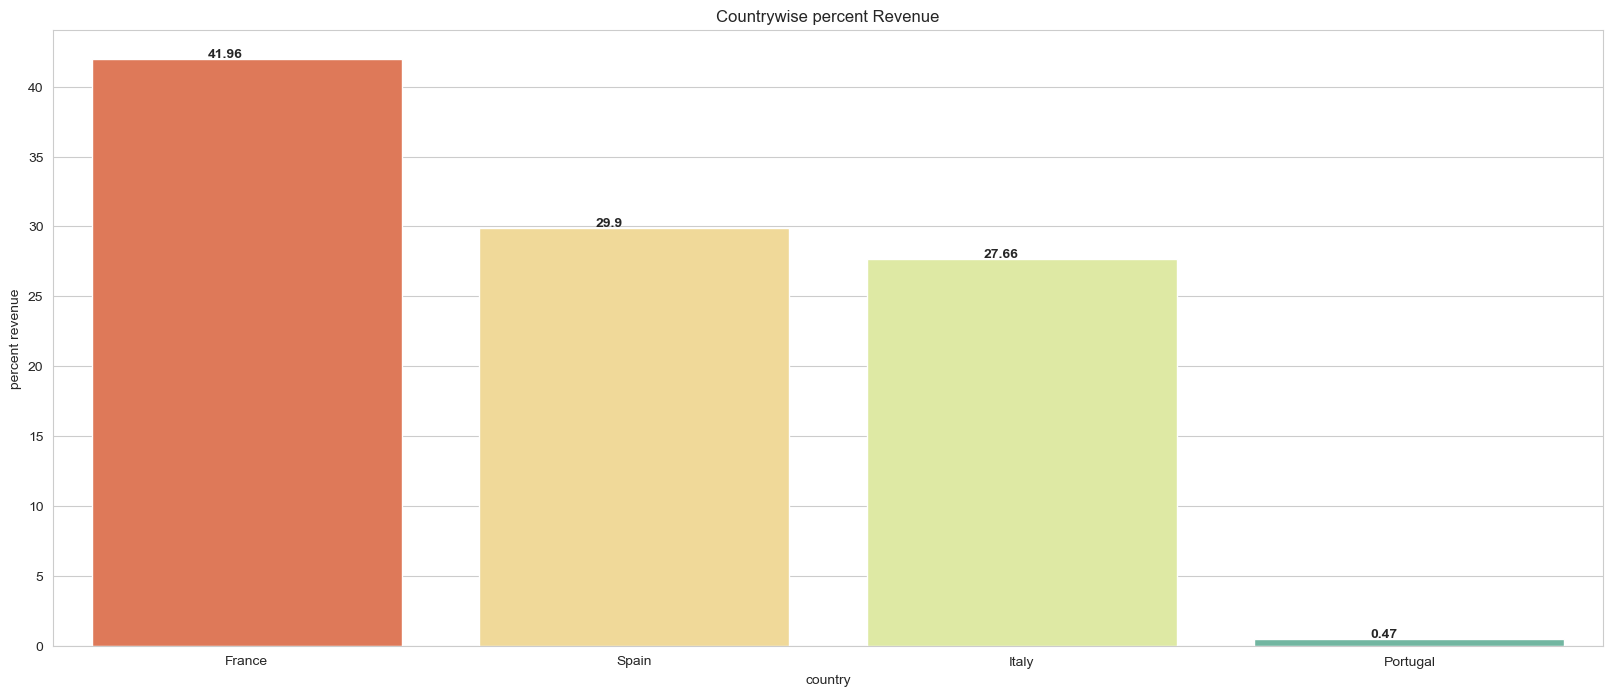

In [826]:
plt.figure(figsize=(20,8))
sbn.barplot(x=SE_country.index,y=SE_country,palette="Spectral")
for i,j in enumerate(SE_country):
    plt.text(i-0.1,j+0.1,j,fontdict={'weight':'bold'})
plt.xlabel("country")
plt.ylabel("percent revenue")
plt.title("Countrywise percent Revenue")

#### Business contribution from Portugal is neglegible. France contributed almost 42% of total region's revenue

#### We will see some important statistics

In [827]:
mean_days_SE=np.mean((SE_win_data['Close Date_dt']-SE_win_data['Created_Date_dt'])).days
min_days_SE=min((SE_win_data['Close Date_dt']-SE_win_data['Created_Date_dt'])).days
max_days_SE=max((SE_win_data['Close Date_dt']-SE_win_data['Created_Date_dt'])).days
max_revenue_SE=max(SE_win_data['Sales Price'])
min_revenue_SE=min(SE_win_data['Sales Price'])

In [828]:
monthwise_revenue_SE=SE_win_data.groupby(by='month_closed_dt')['Sales Price'].agg('sum')
monthwise_revenue_SE=round(monthwise_revenue_SE/1000000,2)

In [829]:
SE_df=pd.DataFrame({'Description':['Avg Days for closure','Min days for closure','Max days for closure','Highest grossing month/revenue','Lowest grossing month/revenue','Avg revenue','Max_order_val','Min_order_val'],
                    'Values':[mean_days_SE,min_days_SE,max_days_SE,(monthwise_revenue_SE[monthwise_revenue_SE==monthwise_revenue_SE.max()].index.values[0],monthwise_revenue_SE.max())
                    ,(monthwise_revenue_SE[monthwise_revenue_SE==monthwise_revenue_SE.min()].index.values[0],monthwise_revenue_SE.min()),monthwise_revenue_SE.mean(),max_revenue_SE,min_revenue_SE]})
SE_df.index=SE_df.Description
SE_df.drop('Description', axis=1,inplace=True)

In [830]:
SE_df

,Values
Description,
Avg Days for closure,42
Min days for closure,-75
Max days for closure,2736
Highest grossing month/revenue,"(3, 26.98)"
Lowest grossing month/revenue,"(2, 13.34)"
Avg revenue,18.081667
Max_order_val,3895000.0
Min_order_val,-110000.0


Text(0.8, 18.581666666666667, 'Avg= 18')

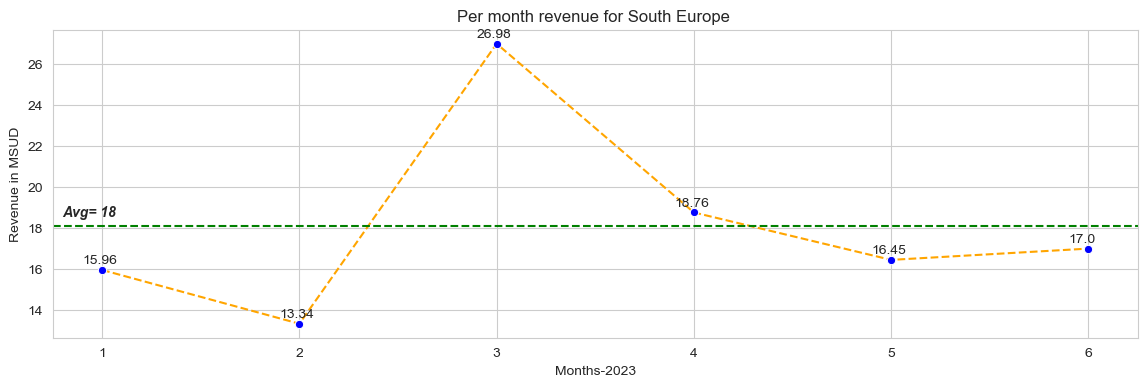

In [831]:
plt.figure(figsize=(14,4))
sbn.lineplot(x=monthwise_revenue_SE.index,y=monthwise_revenue_SE,marker='o', markerfacecolor='blue',markersize=6,color='orange',linestyle='dashed',linewidth=1.5)
plt.axhline(monthwise_revenue_SE.mean(),color='green',linestyle='dashed',label='Avg line')
plt.xlabel("Months-2023")
plt.ylabel("Revenue in MSUD")
plt.title("Per month revenue for South Europe ")
for i,j in enumerate(monthwise_revenue_SE):
    plt.text(i+0.9,j+0.3,j)
plt.text(0.8,monthwise_revenue_SE.mean()+0.5,"Avg= "+str(round(monthwise_revenue_SE.mean())),fontdict={'weight':'bold','style':'italic'})

#### We see here also that two consecutive months saw high and low. When Feb was the least grossing month, March gave us the highest revenue for the six months that we are analyzing. The growth from feb to march was slightly more than double and then again business declined for next two manth and saw a neglegible imrovement in the last month